# Ïù¥ÏÑ±Ï≤†

# AARRR ÏßÄÌëú Ï§ë Activation ÌôïÏù∏
---
## ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Î∞è Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [1]:
## 1.ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨ Ï†ïÎ¶¨ 
import numpy as np
import pandas as pd
from itertools import groupby
from collections import Counter
from datetime import timedelta

# object ÌòïÏãùÏúºÎ°ú Ï†ÄÏû•Îêú Î≥ÄÏàòÎ•º list ÌòïÏãùÏúºÎ°ú Î∞îÍæ∏Í∏∞ ÏúÑÌï¥ÏÑú
import ast

# GCS ÌååÏùº Í≤ΩÎ°úÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
from google.cloud import storage
from google.oauth2 import service_account

# ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import matplotlib.dates as mdates

from itertools import groupby
from collections import Counter
import matplotlib.ticker as mtick


In [2]:
# Ïù∏Ï¶ù
key_path = "/home/sungcheol/codeit_project/codeit_project/config/key.json"
credentials = service_account.Credentials.from_service_account_file(key_path)

# GCS ÌÅ¥ÎùºÏù¥Ïñ∏Ìä∏ ÏÉùÏÑ±
client = storage.Client(credentials=credentials)
bucket = client.bucket("my-advanced-data-bucket")

# 'votes/' Í≤ΩÎ°úÏóê ÏûàÎäî .parquet ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
vote_blobs = bucket.list_blobs(prefix="votes/")
vote_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in vote_blobs if blob.name.endswith(".parquet")]

# Í≤∞Í≥º ÌôïÏù∏
print("Votes files in GCS:")
print(vote_file_list)
print()

# # 'hackle/' Í≤ΩÎ°úÏóê ÏûàÎäî .parquet ÌååÏùº Î¶¨Ïä§Ìä∏ Í∞ÄÏ†∏Ïò§Í∏∞
# hackle_blobs = bucket.list_blobs(prefix="hackle/")
# hackle_file_list = [f"gs://my-advanced-data-bucket/{blob.name}" for blob in hackle_blobs if blob.name.endswith(".parquet")]

# # Í≤∞Í≥º ÌôïÏù∏
# print("Hackle files in GCS:")
# print(hackle_file_list)


Votes files in GCS:
['gs://my-advanced-data-bucket/votes/accounts_attendance.parquet', 'gs://my-advanced-data-bucket/votes/accounts_blockrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_failpaymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_friendrequest.parquet', 'gs://my-advanced-data-bucket/votes/accounts_group.parquet', 'gs://my-advanced-data-bucket/votes/accounts_nearbyschool.parquet', 'gs://my-advanced-data-bucket/votes/accounts_paymenthistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_pointhistory.parquet', 'gs://my-advanced-data-bucket/votes/accounts_school.parquet', 'gs://my-advanced-data-bucket/votes/accounts_timelinereport.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user.parquet', 'gs://my-advanced-data-bucket/votes/accounts_user_contacts.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userquestionrecord.parquet', 'gs://my-advanced-data-bucket/votes/accounts_userwithdraw.parquet', 'gs://my-advanced-data-bucket/vot

In [3]:
# Í≤∞Í≥º Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
df_dict = {}

# vote ÎÇ¥ Í∞Å ÌååÏùºÏùÑ Î∂àÎü¨ÏôÄÏÑú ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•
for title in vote_file_list:
    gcs_path = title
    df_file_name = title.split('/')[-1].replace('.parquet', '')
    
    # Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
    df = pd.read_parquet(gcs_path, storage_options={"token": key_path})
    
    # ÎîïÏÖîÎÑàÎ¶¨Ïóê Ï†ÄÏû•
    df_dict[df_file_name] = df

    # Ï∂úÎ†•
    print(f"{df_file_name} Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌôïÏù∏")
    print("="*50)
    print(df.head())
    print(f"{df_file_name} Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : {df.shape}")
    print()
    print(f"{df_file_name} Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏")
    df.info()
    print("\n" + "-"*70 + "\n")
    

accounts_attendance Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌôïÏù∏
   id                               attendance_date_list  user_id
0   1  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1446852
1   2  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1359398
2   3  ["2023-05-27", "2023-05-29", "2023-05-30", "20...  1501542
3   4  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1507767
4   5  ["2023-05-27", "2023-05-28", "2023-05-29", "20...  1287453
accounts_attendance Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÌÅ¨Í∏∞ : (349637, 3)

accounts_attendance Í∏∞Î≥∏ Ï†ïÎ≥¥ ÌôïÏù∏
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349637 entries, 0 to 349636
Data columns (total 3 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    349637 non-null  int64 
 1   attendance_date_list  349637 non-null  object
 2   user_id               349637 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 8.0+ MB

--------------------------------------

In [4]:
# Í∑∏Î†áÎã§Î©¥ hackle Îç∞Ïù¥ÌÑ∞ÏóêÏÑú event_keyÍ∞Ä "complete_signup"Ïù∏ Îç∞Ïù¥ÌÑ∞ Ï∂îÏ∂úÌï¥ÏÑú ÏãúÍ∞ÑÎåÄ Î∂ÑÌè¨ ÌôïÏù∏
# hackle Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

## GCSÏóêÏÑú Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
final_hackle_df = pd.read_parquet(
    "gs://my-advanced-data-bucket/final_hackle/final.parquet",
    storage_options={"token": "/home/sungcheol/codeit_project/codeit_project/config/key.json"}
)

display(final_hackle_df.head())

event_id      event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e 2023-07-18 19:40:17   
1  00114c10-8321-4978-a73f-fd452162b9f2 2023-07-31 19:11:51   
2  01f136ac-3257-4cf9-b0a9-c0c37fe7e572 2023-07-31 19:14:34   
3  02cc364e-23ec-46cf-a02f-14cf60f97ec1 2023-07-31 19:13:18   
4  05d05a79-cdb3-43fe-b931-5cb0992a36a1 2023-07-31 19:12:50   

             event_key                    session_id  friend_count  \
0       $session_start  4OzYh3seq3VKytpSn5pvQkZNQii1           NaN   
1  click_notice_detail  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
2  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
3  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   
4  click_question_open  4OzYh3seq3VKytpSn5pvQkZNQii1          51.0   

   question_id  heart_balance      id  user_id  \
0          NaN            NaN  367093  1041414   
1          NaN         1719.0  367093  1041414   
2          NaN         1719.0  367093  1041414   
3          NaN         1719.0  367093  1041414   
4          NaN         1719.0  367093  1041414   

                              device_id osname osversion  
0  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
1  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
2  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
3  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0  
4  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74    iOS      16.0

ÏäπÌù¨Í∞Ä Ï†ïÏùòÌïú ÏïÑÌïòÎ™®Î®ºÌä∏ Í∞ÄÏ†∏Ïò§Í∏∞
- ÏïÑÌïò Î™®Î®ºÌä∏
- 14~22Ïãú Ìà¨Ìëú ÏãúÍ∞Ñ
    - polls_questionset ÌÖåÏù¥Î∏îÏùò opening_time ÏóêÏÑú Í∞ÄÏ†∏Ïò®Í±∞ Ï∞∏Í≥†!!
    - opening_timeÏùò Ï§ëÏúÑÏàò
- 20Ìöå Ïù¥ÏÉÅÏù¥ ÌÉÄÏù∏ ÏÑ†ÌÉù Í≤ΩÌóò -> ÏßàÎ¨∏ ÏÑ∏Ìä∏ 2Î≤à ÏôÑÎ£åÏù∏Îç∞
- Í∞ÄÏûÖ ÌõÑ 5Ïùº Ïù¥ÎÇ¥Ïóê Ìà¨Ìëú
- ÌîºÎìúÎ∞± Í≤ΩÌóò 1Ìöå Ïù¥ÏÉÅ

## Ï†ÑÎ∞òÏ†ÅÏù∏ ÏïÑÌïò Î™®Î®ºÌä∏Î•º Í≤ΩÌóòÌïú Ïú†Ï†ÄÎ•º ÌôïÏù∏
---

In [5]:
# ÏïÑÌïò Î™®Î®ºÌä∏Î•º Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï†ïÏùòÌïòÏòÄÏúºÎãà 
# 1. accounts_user ÌÖåÏù¥Î∏îÏóêÏÑú id, created_atÎ•º Ï∂îÏ∂úÌïúÎã§

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞: ÏÇ¨Ïö©ÏûêÏôÄ ÏßàÎ¨∏Í∏∞Î°ù, ÏßàÎ¨∏Ï°∞Í∞Å
df_user = df_dict["accounts_user"]
df_question_record = df_dict["accounts_userquestionrecord"]
df_question_piece = df_dict["polls_questionpiece"]
df_question_Set = df_dict["polls_questionset"]

# created_atÏóê 9ÏãúÍ∞ÑÏùÑ ÎçîÌïú Í∞íÏùÑ signup_timeÏúºÎ°ú ÏÇ¨Ïö©
df_user['created_at'] = df_user['created_at'] + pd.Timedelta(hours=9)
df_question_record['created_at'] = df_question_record['created_at'] + pd.Timedelta(hours=9)
df_question_piece['created_at'] = df_question_piece['created_at'] + pd.Timedelta(hours=9)
df_question_Set["created_at"] = df_question_Set["created_at"] + pd.Timedelta(hours=9)
df_question_Set["opening_time"] = df_question_Set["opening_time"] + pd.Timedelta(hours=9)

# Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏûÖÏùº Ï∂îÏ∂ú (user_id, created_at)
df_user_info = df_user[['id', 'created_at']].copy()
df_user_info = df_user_info.rename(columns={'id': 'user_id'})
df_user_info = df_user_info.rename(columns={'created_at': 'signup_time'})

# df_question_recordÏôÄ df_question_pieceÎ•º question_piece_id(=id) Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
merged_df = df_question_record.merge(
    df_question_piece,
    left_on='question_piece_id',
    right_on='id',
    suffixes=('_record', '_piece')
)

# ÏòàÏãú: Î≥ëÌï© Í≤∞Í≥º ÏÉÅÏúÑ 5Í∞ú Ìñâ ÌôïÏù∏
display(merged_df.head())

id_record status   created_at_record  chosen_user_id  question_id_record  \
0     771777      C 2023-04-28 21:27:49          849469                 252   
1     771800      C 2023-04-28 21:28:02          849446                 244   
2     771812      C 2023-04-28 21:28:09          849454                 183   
3     771828      C 2023-04-28 21:28:16          847375                 101   
4     771851      C 2023-04-28 21:28:26          849477                 209   

   user_id  question_piece_id  has_read answer_status   answer_updated_at  \
0   849436             998458         0             N 2023-04-28 12:27:49   
1   849436             998459         0             N 2023-04-28 12:28:02   
2   849436             998460         1             N 2023-04-28 12:28:09   
3   849436             998461         0             N 2023-04-28 12:28:16   
4   849436             998462         1             N 2023-04-28 12:28:26   

   report_count  opened_times  id_piece  is_voted    created_at_piece  \
0             0             0    998458         1 2023-04-28 21:27:22   
1             0             0    998459         1 2023-04-28 21:27:22   
2             0             0    998460         1 2023-04-28 21:27:22   
3             0             0    998461         1 2023-04-28 21:27:22   
4             0             0    998462         1 2023-04-28 21:27:22   

   question_id_piece  is_skipped  
0                252           0  
1                244           0  
2                183           0  
3                101           0  
4                209           0

In [6]:
# 1. Î≥ëÌï©Îêú Îç∞Ïù¥ÌÑ∞ÏóêÏÑú is_voted == 1Ïù∏ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
voted_merged = merged_df[merged_df['is_voted'] == 1].copy()

# 2. user_idÎ≥ÑÎ°ú Ìà¨ÌëúÏàò, Ï≤´ Ìà¨Ìëú ÏãúÍ∞Ñ, ÎßàÏßÄÎßâ Ìà¨Ìëú ÏãúÍ∞Ñ ÏßëÍ≥Ñ
vote_stats = (
	voted_merged.groupby('user_id')
	.agg(
		vote_count=('id_record', 'size'),
		first_vote_time=('created_at_record', 'min'),
		last_vote_time=('created_at_record', 'max')
	)
	.reset_index()
)

# 3. df_user_infoÏóê Î≥ëÌï©
df_user_info = df_user_info.merge(vote_stats, on='user_id', how='left')

# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨: Ìà¨Ìëú Í∏∞Î°ùÏù¥ ÏóÜÎäî Ïú†Ï†ÄÎäî 0ÏúºÎ°ú
df_user_info['vote_count'] = df_user_info['vote_count'].fillna(0).astype(int)
display(df_user_info.head())

user_id                signup_time  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  
0            NaT  
1            NaT  
2            NaT  
3            NaT  
4            NaT

In [7]:
# user_idÎ≥ÑÎ°ú Ìà¨ÌëúÌïú ÌöüÏàò(vote_count)Îäî Ïù¥ÎØ∏ df_user_infoÏóê Î≥ëÌï©ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
# Ïù¥Ï†ú chosen_user_idÎ≥ÑÎ°ú 'ÏÑ†ÌÉùÎ∞õÏùÄ ÌöüÏàò'(chosen_count)Î•º ÏßëÍ≥ÑÌï¥ÏÑú df_user_infoÏóê Î≥ëÌï©Ìï©ÎãàÎã§.

# 1. chosen_user_idÎ≥ÑÎ°ú ÏÑ†ÌÉùÎ∞õÏùÄ ÌöüÏàò ÏßëÍ≥Ñ
chosen_counts = df_question_record.groupby('chosen_user_id').size().reset_index(name='chosen_count')

# 2. df_user_infoÏóê Î≥ëÌï© (user_idÏôÄ chosen_user_id Îß§Ïπ≠)
df_user_info = df_user_info.merge(
    chosen_counts,
    left_on='user_id',
    right_on='chosen_user_id',
    how='left'
)

# 3. Í≤∞Ï∏°Í∞í(ÏÑ†ÌÉùÎ∞õÏùÄ Ï†Å ÏóÜÎäî Ïú†Ï†Ä)ÏùÄ 0ÏúºÎ°ú Ï≤òÎ¶¨
df_user_info['chosen_count'] = df_user_info['chosen_count'].fillna(0).astype(int)

# 4. ÌïÑÏöîÏãú chosen_user_id Ïª¨ÎüºÏùÄ Ï†úÍ±∞
df_user_info = df_user_info.drop(columns=['chosen_user_id'])

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info.head())

user_id                signup_time  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  chosen_count  
0            NaT             0  
1            NaT             0  
2            NaT             0  
3            NaT             0  
4            NaT             0

In [8]:
# user_idÎ≥ÑÎ°ú Ï≤òÏùå ÌîºÎìúÎ∞±(=chosen_user_idÎ°ú ÏÑ†ÌÉùÎêú Í∏∞Î°ù) Î∞õÏùÄ ÎÇ†Ïßú Íµ¨ÌïòÍ∏∞
first_feedback = (
    df_question_record
    .sort_values('created_at')
    .groupby('chosen_user_id')['created_at']
    .first()
    .reset_index()
    .rename(columns={'created_at': 'first_feedback_time', 'chosen_user_id': 'user_id'})
)

# df_user_infoÏóê Î≥ëÌï©
df_user_info = df_user_info.merge(first_feedback, on='user_id', how='left')

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info[['user_id', 'first_feedback_time']].head())

user_id first_feedback_time
0   831956                 NaT
1   831962                 NaT
2   832151                 NaT
3   832340                 NaT
4   832520                 NaT

In [9]:
# 'ÌöåÏõêÍ∞ÄÏûÖ ÌõÑ 5Ïùº Ïù¥ÎÇ¥ Ìà¨Ìëú Ïó¨Î∂Ä' Ïª¨Îüº Ï∂îÍ∞Ä
# df_user_info: user_id, signup_time, vote_count, first_vote_time, ...
# Ï°∞Í±¥: first_vote_timeÏù¥ ÏûàÍ≥†, (first_vote_time - signup_time) <= 5Ïùº

df_user_info['voted_within_5days'] = (
    (df_user_info['first_vote_time'].notnull()) &
    ((df_user_info['first_vote_time'] - df_user_info['signup_time']) <= pd.Timedelta(days=5))
)

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info[['user_id', 'signup_time', 'first_vote_time', 'voted_within_5days']].head())

df_user_info.head()

user_id                signup_time first_vote_time  voted_within_5days
0   831956 2023-03-29 12:44:14.047130             NaT               False
1   831962 2023-03-29 14:18:56.162368             NaT               False
2   832151 2023-03-29 21:56:34.989468             NaT               False
3   832340 2023-03-29 21:56:35.020790             NaT               False
4   832520 2023-03-29 21:56:35.049311             NaT               False

user_id                signup_time  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  chosen_count first_feedback_time  voted_within_5days  
0            NaT             0                 NaT               False  
1            NaT             0                 NaT               False  
2            NaT             0                 NaT               False  
3            NaT             0                 NaT               False  
4            NaT             0                 NaT               False

In [10]:
# user_idÎ≥ÑÎ°ú opening_timeÏùò Ï§ëÏúÑÏàò(Ï§ëÏïôÍ∞í)Î•º Íµ¨Ìï¥ ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú Ï†ÄÏû•
user_opening_time_median = df_question_Set.groupby('user_id')['opening_time'].median().reset_index()
user_opening_time_median = user_opening_time_median.rename(columns={'opening_time': 'opening_time_median'})

# Í≤∞Í≥º ÌôïÏù∏
display(user_opening_time_median.head())

user_id     opening_time_median
0   838023 2023-05-02 15:39:51.000
1   838466 2023-05-04 21:36:31.000
2   838642 2023-04-28 23:43:22.000
3   839357 2023-05-01 22:51:05.500
4   840293 2023-05-04 18:01:22.000

In [11]:
# df_user_infoÏôÄ user_opening_time_medianÏùÑ user_id Í∏∞Ï§ÄÏúºÎ°ú Î≥ëÌï©
df_user_info = df_user_info.merge(user_opening_time_median, on='user_id', how='left')

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info.head())

user_id                signup_time  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  chosen_count first_feedback_time  voted_within_5days  \
0            NaT             0                 NaT               False   
1            NaT             0                 NaT               False   
2            NaT             0                 NaT               False   
3            NaT             0                 NaT               False   
4            NaT             0                 NaT               False   

  opening_time_median  
0                 NaT  
1                 NaT  
2                 NaT  
3                 NaT  
4                 NaT

In [12]:
# df_user_info['opening_time_median']Í∞Ä 14~22Ïãú(Ìè¨Ìï®) ÏÇ¨Ïù¥Ïóê ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Ïª¨Îüº Ï∂îÍ∞Ä
# opening_time_medianÏù¥ Í≤∞Ï∏°Ïù¥ ÏïÑÎãå Í≤ΩÏö∞ÏóêÎßå Ï†ÅÏö©
df_user_info['opening_14_22'] = (
    df_user_info['opening_time_median'].dt.hour.between(14, 22, inclusive='both')
)

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info[['user_id', 'opening_time_median', 'opening_14_22']].head())

user_id opening_time_median  opening_14_22
0   831956                 NaT          False
1   831962                 NaT          False
2   832151                 NaT          False
3   832340                 NaT          False
4   832520                 NaT          False

In [13]:
# chosen_countÍ∞Ä 1 Ïù¥ÏÉÅÏù∏ Ïú†Ï†Ä Íµ¨Î∂Ñ Ïª¨Îüº Ï∂îÍ∞Ä
df_user_info['chosen_count_ge_1'] = df_user_info['chosen_count'] >= 1

# vote_countÍ∞Ä 20 Ïù¥ÏÉÅÏù∏ Ïú†Ï†Ä Íµ¨Î∂Ñ Ïª¨Îüº Ï∂îÍ∞Ä
df_user_info['vote_count_ge_20'] = df_user_info['vote_count'] >= 20

# Í≤∞Í≥º ÌôïÏù∏
display(df_user_info[['user_id', 'chosen_count', 'chosen_count_ge_1', 'vote_count', 'vote_count_ge_20']].head())

user_id  chosen_count  chosen_count_ge_1  vote_count  vote_count_ge_20
0   831956             0              False           0             False
1   831962             0              False           0             False
2   832151             0              False           0             False
3   832340             0              False           0             False
4   832520             0              False           0             False

In [14]:
to_check_aha = df_user_info[["user_id","signup_time","first_vote_time","first_feedback_time","voted_within_5days","opening_14_22","chosen_count_ge_1","vote_count_ge_20"]]
display(to_check_aha.head())

user_id                signup_time first_vote_time first_feedback_time  \
0   831956 2023-03-29 12:44:14.047130             NaT                 NaT   
1   831962 2023-03-29 14:18:56.162368             NaT                 NaT   
2   832151 2023-03-29 21:56:34.989468             NaT                 NaT   
3   832340 2023-03-29 21:56:35.020790             NaT                 NaT   
4   832520 2023-03-29 21:56:35.049311             NaT                 NaT   

   voted_within_5days  opening_14_22  chosen_count_ge_1  vote_count_ge_20  
0               False          False              False             False  
1               False          False              False             False  
2               False          False              False             False  
3               False          False              False             False  
4               False          False              False             False

/tmp/ipykernel_192685/2355636439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  to_check_aha['year_month'] = to_check_aha['signup_time'].dt.to_period('M')


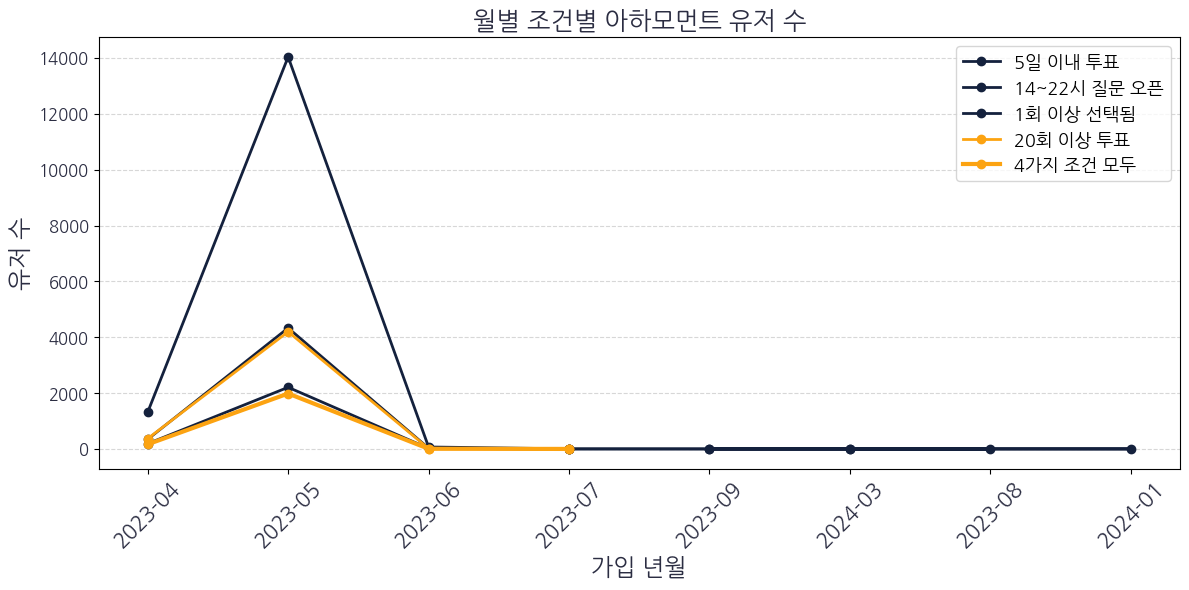

In [15]:
# ÎÖÑÏõî Ïª¨Îüº ÏÉùÏÑ±
to_check_aha['year_month'] = to_check_aha['signup_time'].dt.to_period('M')

# Ï°∞Í±¥Î≥Ñ Ïª¨ÎüºÎ™ÖÍ≥º ÌïúÍ∏Ä ÎùºÎ≤® Îß§Ìïë
condition_cols = {
    'voted_within_5days': '5Ïùº Ïù¥ÎÇ¥ Ìà¨Ìëú',
    'opening_14_22': '14~22Ïãú ÏßàÎ¨∏ Ïò§Ìîà',
    'chosen_count_ge_1': '1Ìöå Ïù¥ÏÉÅ ÏÑ†ÌÉùÎê®',
    'vote_count_ge_20': '20Ìöå Ïù¥ÏÉÅ Ìà¨Ìëú'
}

# ÎÖÑÏõîÎ≥Ñ Í∞Å Ï°∞Í±¥ ÎßåÏ°± Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
monthly_counts = {}
for col, label in condition_cols.items():
    monthly_counts[label] = to_check_aha[to_check_aha[col]].groupby('year_month')['user_id'].nunique()

# 4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê ÎßåÏ°±ÌïòÎäî Ïú†Ï†Ä
all_cond = to_check_aha[
    to_check_aha['voted_within_5days'] &
    to_check_aha['opening_14_22'] &
    to_check_aha['chosen_count_ge_1'] &
    to_check_aha['vote_count_ge_20']
]
all_cond_monthly = all_cond.groupby('year_month')['user_id'].nunique()

import matplotlib.pyplot as plt

# ÏÉâÏÉÅ ÌÖúÌîåÎ¶ø
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))
for i, (label, counts) in enumerate(monthly_counts.items()):
    plt.plot(counts.index.astype(str), counts.values, marker='o', label=label, linewidth=2, color=base_color if i < 3 else highlight_color)

# 4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê ÎßåÏ°±ÌïòÎäî Ïú†Ï†Ä Í∞ïÏ°∞
plt.plot(all_cond_monthly.index.astype(str), all_cond_monthly.values, marker='o', label='4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê', linewidth=3, color=highlight_color)

plt.title('ÏõîÎ≥Ñ Ï°∞Í±¥Î≥Ñ ÏïÑÌïòÎ™®Î®ºÌä∏ Ïú†Ï†Ä Ïàò', fontsize=18, color=text_color)
plt.xlabel('Í∞ÄÏûÖ ÎÖÑÏõî', fontsize=17, color=text_color)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.xticks(rotation = 45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

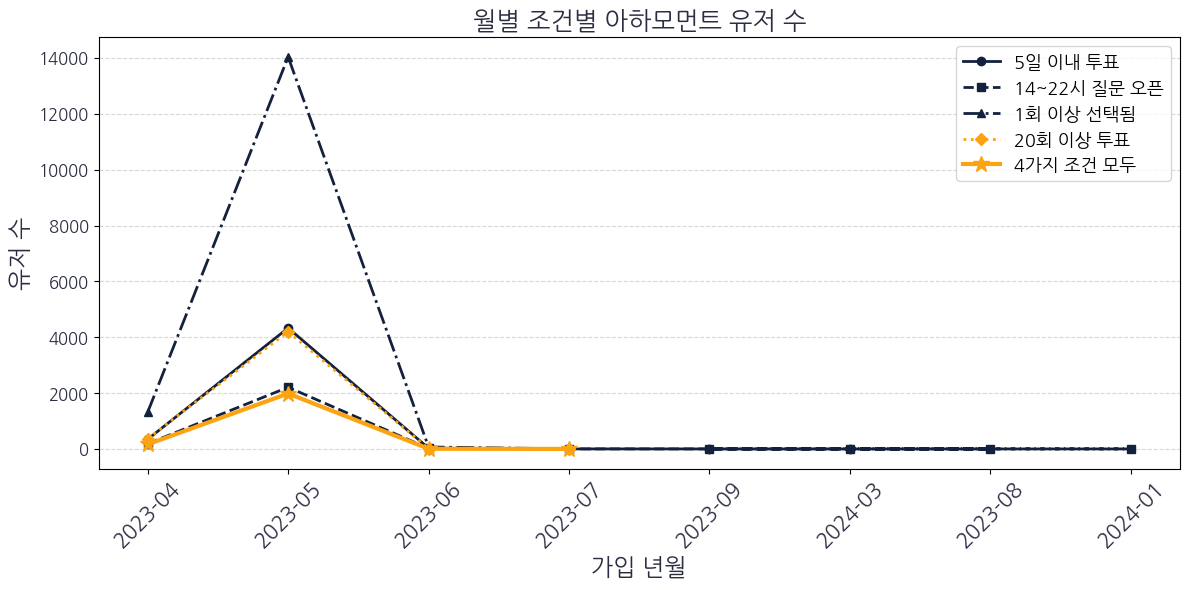

In [16]:
# ÏÑ† Ïä§ÌÉÄÏùºÍ≥º ÎßàÏª§ Ïä§ÌÉÄÏùºÏùÑ Ï°∞Í±¥Î≥ÑÎ°ú Îã§Î•¥Í≤å ÏßÄÏ†ï
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']

plt.figure(figsize=(12, 6))
for i, (label, counts) in enumerate(monthly_counts.items()):
    plt.plot(
        counts.index.astype(str),
        counts.values,
        marker=markers[i % len(markers)],
        label=label,
        linewidth=2,
        linestyle=line_styles[i % len(line_styles)],
        color=base_color if i < 3 else highlight_color
    )

# 4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê ÎßåÏ°±ÌïòÎäî Ïú†Ï†Ä Í∞ïÏ°∞ (ÍµµÏùÄ Ïã§ÏÑ†, Î≥Ñ ÎßàÏª§)
plt.plot(
    all_cond_monthly.index.astype(str),
    all_cond_monthly.values,
    marker='*',
    label='4Í∞ÄÏßÄ Ï°∞Í±¥ Î™®Îëê',
    linewidth=3,
    linestyle='-',
    color=highlight_color,
    markersize=12
)

plt.title('ÏõîÎ≥Ñ Ï°∞Í±¥Î≥Ñ ÏïÑÌïòÎ™®Î®ºÌä∏ Ïú†Ï†Ä Ïàò', fontsize=18, color=text_color)
plt.xlabel('Í∞ÄÏûÖ ÎÖÑÏõî', fontsize=17, color=text_color)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### Í∑∏ÎûòÌîÑ Ìï¥ÏÑù
1. 2023ÎÖÑ 5Ïõî, Î™®Îì† Ï°∞Í±¥ Ï∂©Ï°± Ïú†Ï†ÄÍ∞Ä Ìè≠Î∞úÏ†ÅÏúºÎ°ú Ï¶ùÍ∞Ä
ÏïÑÌïò Î™®Î®ºÌä∏ ÏôÑÏÑ± Ïú†Ï†ÄÍ∞Ä Ï†ïÏ†êÏóê Îã¨Ìïú ÏãúÏ†ê        
Î™®Îì† Ï°∞Í±¥ÏóêÏÑú Ïú†Ï†Ä ÏàòÍ∞Ä ÎèôÏãúÏóê ÏÉÅÏäπ ‚Üí ÏÑúÎπÑÏä§ ÌîºÌÅ¨ ÏãúÍ∏∞

    > ÌäπÌûà ‚Äò1Ìöå Ïù¥ÏÉÅ ÏÑ†ÌÉùÎê®‚Äô Ï°∞Í±¥Ïù¥ 14,000Î™Ö Ïù¥ÏÉÅÏúºÎ°ú Îã§Î•∏ Ï°∞Í±¥Î≥¥Îã§ ÏõîÎì±Ìûà ÎÜíÏùå     
    > ‚Üí Ïù¥ ÏãúÏ†êÏóê ÏßàÎ¨∏Í≥º Ìà¨ÌëúÏùò ÏÉÅÌò∏ÏûëÏö©Ïù¥ Í∞ÄÏû• ÌôúÎ∞úÌñàÏùåÏùÑ ÏùòÎØ∏

    > 5ÏõîÏùÄ Ïù¥ SNS Ïï±Ïù¥ Ï¥àÍ∏∞ Î∞îÏù¥Îü¥ or Ï∫†ÌéòÏù∏ Îì±ÏúºÎ°ú Ïú†ÏûÖ Ìè≠Ï¶ùÏù¥ ÏûàÏóàÎçò ÏãúÍ∏∞Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÌÅΩÎãàÎã§.     
    > ÎßéÏùÄ Ïú†Ï†ÄÍ∞Ä Ïú†ÏûÖÎêòÍ≥†, ÌïµÏã¨ Í∏∞Îä•Ïù∏ ÏßàÎ¨∏ Ï∞∏Ïó¨ ‚Üí ÌîºÎìúÎ∞± Î∞õÍ∏∞ÍπåÏßÄ Í≤ΩÌóòÌïú ÎåÄÌëúÏ†Å ÌôúÏÑ±ÌôîÏùò Îã¨ÏûÑ

2. 2023ÎÖÑ 6Ïõî Ïù¥ÌõÑ Í∏âÍ≤©Ìïú Í∞êÏÜå, Í±∞Ïùò Î™®Îì† Ï°∞Í±¥ Ï∂©Ï°± Ïú†Ï†Ä ÏàòÍ∞Ä 0Ïóê Í∞ÄÍπåÏõÄ
    > ÌäπÌûà ÏïÑÌïò Î™®Î®ºÌä∏ Ïú†Ï†Ä Ïàò = 0Î™ÖÏù∏ Îã¨Îì§Ïù¥ Ïù¥Ïñ¥Ïßê        
    > Ïú†ÏûÖÎèÑ Í∞êÏÜåÌïòÍ≥†, Í∏∞Ï°¥ Ïú†Ï†ÄÏùò ÌôúÏÑ±ÎèÑÎèÑ Í∏âÍ≤©Ìûà ÎÇÆÏïÑÏßê

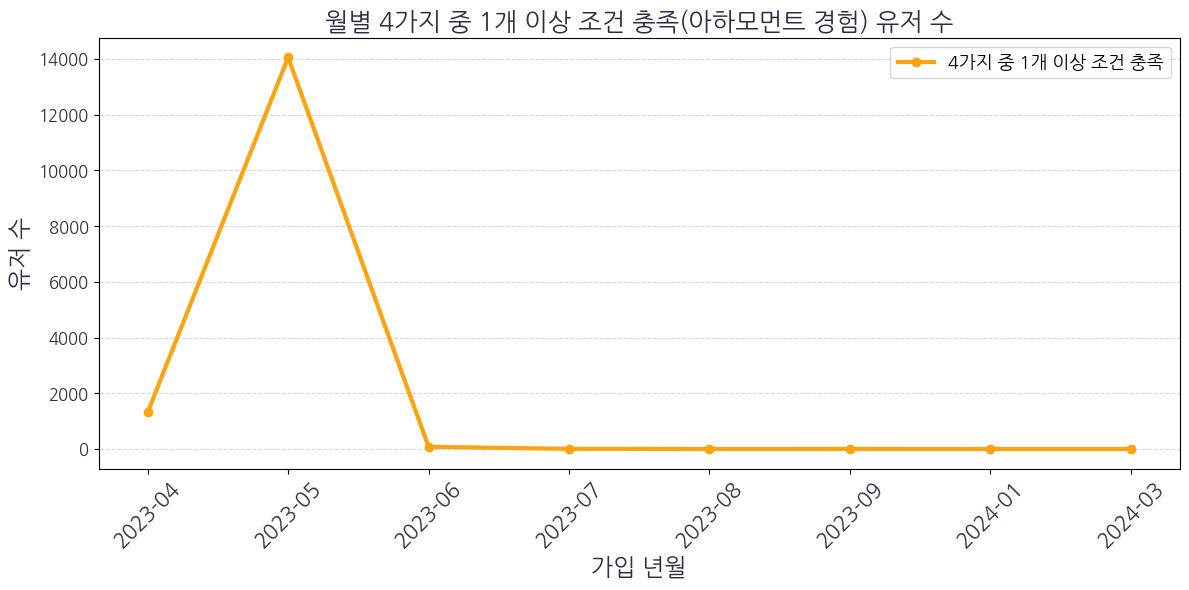

In [17]:
# 4Í∞ÄÏßÄ Ï°∞Í±¥ Ï§ë ÌïòÎÇòÎùºÎèÑ Ï∂©Ï°±Ìïú Ïú†Ï†Ä: Ï°∞Í±¥ Ïª¨Îüº Ï§ë ÌïòÎÇòÎùºÎèÑ TrueÏù∏ Í≤ΩÏö∞
any_cond = to_check_aha[
    to_check_aha[['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']].any(axis=1)
]

# ÎÖÑÏõîÎ≥ÑÎ°ú ÌïòÎÇòÎùºÎèÑ Ï°∞Í±¥ Ï∂©Ï°±Ìïú Ïú†Ï†Ä Ïàò ÏßëÍ≥Ñ
any_cond_monthly = any_cond.groupby('year_month')['user_id'].nunique()

plt.figure(figsize=(12, 6))
plt.plot(any_cond_monthly.index.astype(str), any_cond_monthly.values, marker='o', color=highlight_color, linewidth=3, label='4Í∞ÄÏßÄ Ï§ë 1Í∞ú Ïù¥ÏÉÅ Ï°∞Í±¥ Ï∂©Ï°±')

plt.title('ÏõîÎ≥Ñ 4Í∞ÄÏßÄ Ï§ë 1Í∞ú Ïù¥ÏÉÅ Ï°∞Í±¥ Ï∂©Ï°±(ÏïÑÌïòÎ™®Î®ºÌä∏ Í≤ΩÌóò) Ïú†Ï†Ä Ïàò', fontsize=18, color=text_color)
plt.xlabel('Í∞ÄÏûÖ ÎÖÑÏõî', fontsize=17, color=text_color)
plt.ylabel('Ïú†Ï†Ä Ïàò', fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color, rotation=45)
plt.yticks(fontsize=12, color=text_color)
plt.legend(fontsize=13)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### ÏïÑÌïò Î™®Î®ºÌä∏ Í≤ΩÌóòÏùò ÏàòÏóê ÎåÄÌïú Í≥†Ï∞∞
---

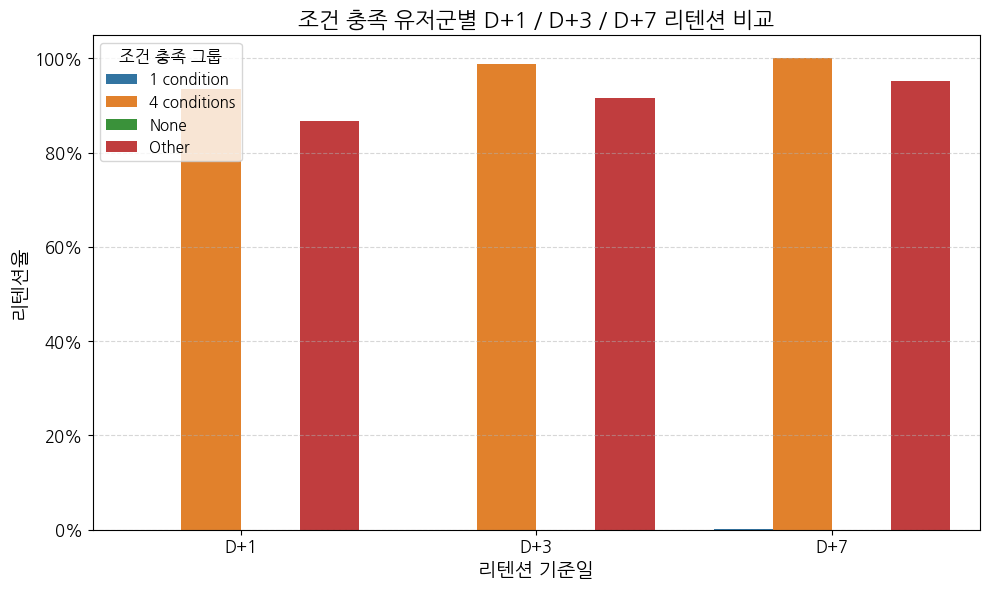

In [18]:
# Ïú†Ï†ÄÎ≥Ñ Ï°∞Í±¥ Ï∂©Ï°± Ïó¨Î∂ÄÎ•º Í∞ÄÏ†ï (Ïù¥Ï†Ñ Î∂ÑÏÑù Í≤∞Í≥º ÌôúÏö©)
to_check_aha = df_user_info.copy()

# Í∞Å Ï°∞Í±¥ BooleanÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
condition_cols = ['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']
for col in condition_cols:
    to_check_aha[col] = to_check_aha[col].fillna(False)

# Ï∂©Ï°± Ï°∞Í±¥ Ïàò Í≥ÑÏÇ∞
to_check_aha['condition_count'] = to_check_aha[condition_cols].sum(axis=1)

# Ï°∞Í±¥ Í∑∏Î£π ÌÉúÍ∑∏: 0, 1, 4Îßå Ï∂îÏ∂ú
def tag_condition_group(row):
    if row['condition_count'] == 4:
        return '4 conditions'
    elif row['condition_count'] == 1:
        return '1 condition'
    elif row['condition_count'] == 0:
        return 'None'
    else:
        return 'Other'

to_check_aha['group'] = to_check_aha.apply(tag_condition_group, axis=1)

# Î¶¨ÌÖêÏÖò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Ïú†Ï†Ä ÌôúÎèô Î°úÍ∑∏ÏóêÏÑú ÏµúÏ¥à Í∞ÄÏûÖÏùº Ïù¥ÌõÑ +nÏùº ÏïàÏóê ÌôúÎèô Ïó¨Î∂Ä ÌååÏïÖ
# df_vote ÌôúÏö©
df_vote = df_dict["accounts_userquestionrecord"]
df_vote['created_at'] = pd.to_datetime(df_vote['created_at']) + pd.Timedelta(hours=9)

# Ïú†Ï†ÄÎ≥Ñ Í∞ÄÏûÖÏùº Í∏∞Ï§ÄÏúºÎ°ú +1Ïùº, +3Ïùº, +7Ïùº Î¶¨ÌÖêÏÖò
ret_days = [1, 3, 7]
retention_data = []

for day in ret_days:
    # Í∏∞Ï§ÄÏùº Ïù¥ÌõÑ day ÏïàÏóê ÌôúÎèôÌïú user_id
    merged = df_vote.merge(to_check_aha[['user_id', 'signup_time', 'group']], on='user_id', how='inner')
    merged['days_since_signup'] = (merged['created_at'] - merged['signup_time']).dt.days
    active_users = merged[(merged['days_since_signup'] >= 0) & (merged['days_since_signup'] <= day)]
    
    # Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞: Ï†ÑÏ≤¥ Í∑∏Î£πÎ≥Ñ Ïú†Ï†Ä Ïàò ÎåÄÎπÑ day ÏïàÏóê ÌôúÎèôÌïú Ïú†Ï†Ä Ïàò
    total_counts = to_check_aha.groupby('group')['user_id'].nunique()
    active_counts = active_users.groupby('group')['user_id'].nunique()
    retention = (active_counts / total_counts).fillna(0).reset_index()
    retention.columns = ['group', 'retention_rate']
    retention['day'] = f'D+{day}'
    retention_data.append(retention)

# Í≤∞Í≥º ÌÜµÌï©
retention_df = pd.concat(retention_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=retention_df, x='day', y='retention_rate', hue='group')
plt.title("Ï°∞Í±¥ Ï∂©Ï°± Ïú†Ï†ÄÍµ∞Î≥Ñ D+1 / D+3 / D+7 Î¶¨ÌÖêÏÖò ÎπÑÍµê", fontsize=16)
plt.xlabel("Î¶¨ÌÖêÏÖò Í∏∞Ï§ÄÏùº", fontsize=14)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Ï°∞Í±¥ Ï∂©Ï°± Í∑∏Î£π", fontsize=11, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Ï¢Ä Îçî ÏÑ∏Î∂ÑÌôîÌï¥ÏÑú Î¶¨ÌÖêÏÖòÎ•† ÎπÑÍµê

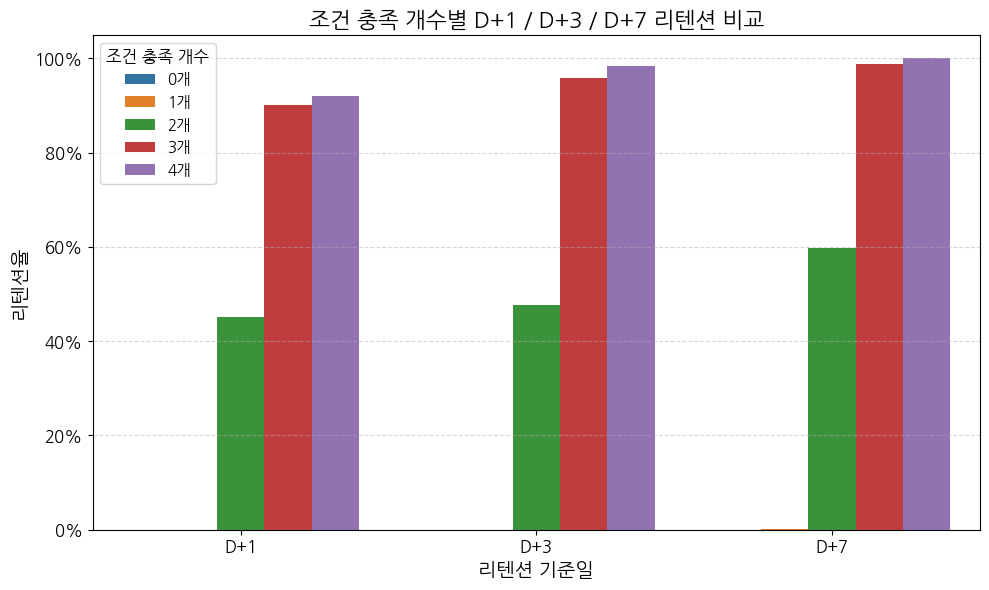

In [19]:
# Ïú†Ï†ÄÎ≥Ñ Ï°∞Í±¥ Ï∂©Ï°± Ïó¨Î∂ÄÎ•º Í∞ÄÏ†ï (Ïù¥Ï†Ñ Î∂ÑÏÑù Í≤∞Í≥º ÌôúÏö©)
to_check_aha = df_user_info.copy()

# Í∞Å Ï°∞Í±¥ BooleanÏù¥ ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥† Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨
condition_cols = ['voted_within_5days', 'opening_14_22', 'chosen_count_ge_1', 'vote_count_ge_20']
for col in condition_cols:
    to_check_aha[col] = to_check_aha[col].fillna(False)

# Ï∂©Ï°± Ï°∞Í±¥ Ïàò Í≥ÑÏÇ∞
to_check_aha['condition_count'] = to_check_aha[condition_cols].sum(axis=1)

# Ï°∞Í±¥ Í∑∏Î£π ÌÉúÍ∑∏: 0~4Í∞ú Ï∂©Ï°±ÏúºÎ°ú ÏÑ∏Î∂ÑÌôî
def tag_condition_group(n):
    if n == 0:
        return '0Í∞ú'
    elif n == 1:
        return '1Í∞ú'
    elif n == 2:
        return '2Í∞ú'
    elif n == 3:
        return '3Í∞ú'
    elif n == 4:
        return '4Í∞ú'
    else:
        return 'Í∏∞ÌÉÄ'

to_check_aha['group'] = to_check_aha['condition_count'].apply(tag_condition_group)

# Î¶¨ÌÖêÏÖò Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Ïú†Ï†Ä ÌôúÎèô Î°úÍ∑∏ÏóêÏÑú ÏµúÏ¥à Í∞ÄÏûÖÏùº Ïù¥ÌõÑ +nÏùº ÏïàÏóê ÌôúÎèô Ïó¨Î∂Ä ÌååÏïÖ
df_vote = df_dict["accounts_userquestionrecord"]
df_vote['created_at'] = pd.to_datetime(df_vote['created_at']) + pd.Timedelta(hours=9)

ret_days = [1, 3, 7]
retention_data = []

for day in ret_days:
    merged = df_vote.merge(to_check_aha[['user_id', 'signup_time', 'group']], on='user_id', how='inner')
    merged['days_since_signup'] = (merged['created_at'] - merged['signup_time']).dt.days
    active_users = merged[(merged['days_since_signup'] >= 0) & (merged['days_since_signup'] <= day)]
    total_counts = to_check_aha.groupby('group')['user_id'].nunique()
    active_counts = active_users.groupby('group')['user_id'].nunique()
    retention = (active_counts / total_counts).fillna(0).reset_index()
    retention.columns = ['group', 'retention_rate']
    retention['day'] = f'D+{day}'
    retention_data.append(retention)

retention_df = pd.concat(retention_data)

plt.figure(figsize=(10, 6))
sns.barplot(data=retention_df, x='day', y='retention_rate', hue='group')
plt.title("Ï°∞Í±¥ Ï∂©Ï°± Í∞úÏàòÎ≥Ñ D+1 / D+3 / D+7 Î¶¨ÌÖêÏÖò ÎπÑÍµê", fontsize=16)
plt.xlabel("Î¶¨ÌÖêÏÖò Í∏∞Ï§ÄÏùº", fontsize=14)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Ï°∞Í±¥ Ï∂©Ï°± Í∞úÏàò", fontsize=11, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

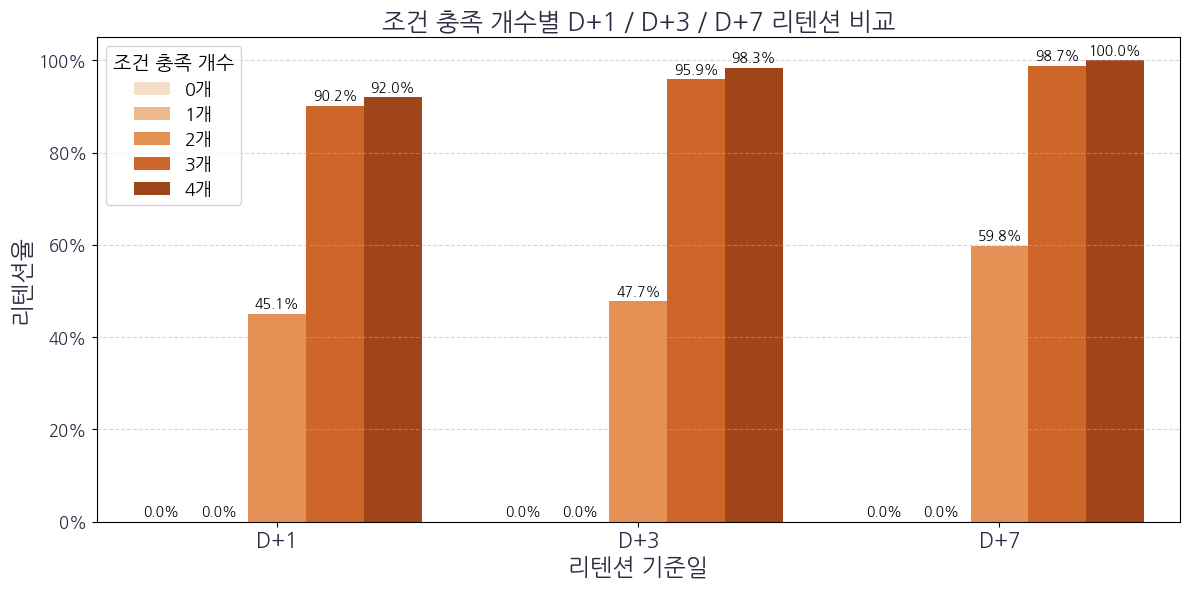

In [20]:
# ÏÉâÏÉÅ ÌÖúÌîåÎ¶ø
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=retention_df,
    x='day',
    y='retention_rate',
    hue='group',
    palette='Oranges'
)
plt.title("Ï°∞Í±¥ Ï∂©Ï°± Í∞úÏàòÎ≥Ñ D+1 / D+3 / D+7 Î¶¨ÌÖêÏÖò ÎπÑÍµê", fontsize=18, color=text_color)
plt.xlabel("Î¶¨ÌÖêÏÖò Í∏∞Ï§ÄÏùº", fontsize=17, color=text_color)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=17, color=text_color)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.legend(title="Ï°∞Í±¥ Ï∂©Ï°± Í∞úÏàò", fontsize=13, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Í∞Å Î∞î ÏúÑÏóê ÌçºÏÑºÌä∏ Í∞í ÌëúÏãú (0.0%ÎèÑ Ìï≠ÏÉÅ ÌëúÏãú)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2,
                 labels=[f"{v*100:.1f}%" for v in container.datavalues])

plt.show()

#### Í∑∏ÎûòÌîÑ Ìï¥ÏÑù
- 1. ÏïÑÌïò Î™®Î®ºÌä∏ Ï∂©Ï°± Í∞úÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Î¶¨ÌÖêÏÖòÏù¥ ÎöúÎ†∑ÌïòÍ≤å Ï¶ùÍ∞Ä
> 0Í∞ú~2Í∞ú Ï∂©Ï°± Ïú†Ï†ÄÎäî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Î¶¨ÌÖêÏÖòÏù¥ ÎÇÆÍ≥†, D+1~D+7 Í∏∞Ï§ÄÏóêÏÑú Í∞ÄÌååÎ•∏ ÏÉÅÏäπ Í≥°ÏÑ†Ïù¥ ÎÇòÌÉÄÎÇòÏßÄ ÏïäÏùå.      
> 3Í∞ú Ïù¥ÏÉÅ Ï∂©Ï°± Ïú†Ï†ÄÎäî D+1Î∂ÄÌÑ∞ D+7ÍπåÏßÄ 90% Ïù¥ÏÉÅÏùò Î¶¨ÌÖêÏÖòÏùÑ ÏïàÏ†ïÏ†ÅÏúºÎ°ú Ïú†ÏßÄ.     
> 4Í∞ú Ï∂©Ï°± Ïú†Ï†ÄÎäî Í±∞Ïùò 100%Ïóê Í∞ÄÍπåÏö¥ Î¶¨ÌÖêÏÖòÏú®ÏùÑ Î≥¥Ïù¥Î©∞, Í∞ÄÏû• Ï∂©ÏÑ±ÎèÑ ÎÜíÏùÄ Ïú†Ï†ÄÍµ∞ÏûÑÏùÑ ÏãúÏÇ¨.

- 2. ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎèÑ Î¶¨ÌÖêÏÖò Í≤©Ï∞®Îäî Ïú†ÏßÄ
> ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎ©¥ÏÑú Ï†ÑÏ≤¥ Î¶¨ÌÖêÏÖòÏùÄ ÏïΩÍ∞ÑÏî© ÌïòÎùΩÌïòÎÇò, Ï∂©Ï°± Í∞úÏàòÎ≥Ñ Î¶¨ÌÖêÏÖò Í∞Ñ Ï∞®Ïù¥Îäî ÏßÄÏÜç Ïú†ÏßÄÎê®.

3. ÏïÑÌïò Î™®Î®ºÌä∏ 2Í∞úÍ∞Ä ‚ÄòÏûÑÍ≥ÑÏ†ê‚ÄôÏ≤òÎüº Î≥¥ÏûÑ
> 1Í∞ú Ïù¥Ìïò Ï∂©Ï°± Ïú†Ï†ÄÎäî Î™®Îëê 0ÏúºÎ°ú Î≥¥Ïù¥Í≥†, 2Í∞ú ‚Üí 3Í∞úÎ°ú ÎÑòÏñ¥Í∞à Îïå Î¶¨ÌÖêÏÖòÏù¥ ÌÅ¨Í≤å Îõ∞Îäî ÏßÄÏ†êÏù¥ Ï°¥Ïû¨.     
> Ï¶â, **‚Äú2Í∞úÍπåÏßÄÎäî Ïù¥ÌÉà ÏúÑÌóòÍµ∞, 3Í∞úÎ∂ÄÌÑ∞Îäî Ï∂©ÏÑ± Ïú†Ï†ÄÎ°ú Ï†ÑÌôòÎêòÎäî Í≤ΩÍ≥Ñ‚Äù**Ïùº Ïàò ÏûàÏùå.

#### Ïù∏ÏÇ¨Ïù¥Ìä∏ Î∞è ÏãúÏÇ¨Ï†ê
- 1. ÏïÑÌïò Î™®Î®ºÌä∏ Ï∂©Ï°± Ïú†ÎèÑÎäî Î¶¨ÌÖêÏÖòÍ≥º Í∞ïÌïú ÏÉÅÍ¥Ä
Îã®ÏàúÌûà ÌöåÏõêÍ∞ÄÏûÖÎßå Ïú†ÎèÑÌïòÎäî Í≤ÉÏùÑ ÎÑòÏñ¥, Ï¥àÎ∞òÏóê Ïú†Ï†ÄÍ∞Ä 3Í∞ú Ïù¥ÏÉÅÏùò ÏïÑÌïò Î™®Î®ºÌä∏Î•º Í≤ΩÌóòÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.

Ïòà: Ïò®Î≥¥Îî© ÌäúÌÜ†Î¶¨Ïñº, Ï∂îÏ≤ú ÌÄòÏä§Ìä∏, Ï¥àÍ∏∞ ÌîºÎìú Ïª§Ïä§ÌÑ∞ÎßàÏù¥Ïßï Îì± ÌÜµÌï¥ ÏïÑÌïò ÌñâÎèôÏùÑ ÏûêÏó∞Ïä§ÎüΩÍ≤å Ïú†ÎèÑ.

- 2. 2Í∞ú Ïù¥Ìïò Ï∂©Ï°± Ïú†Ï†Ä ÎåÄÏÉÅ Î¶¨ÎßàÏù∏Îçî Ï∫†ÌéòÏù∏ ÌïÑÏöî
Ïù¥ Ïú†Ï†ÄÎì§ÏùÄ Ïù¥ÌÉà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ ÏßëÎã®Ïù¥ÎØÄÎ°ú, Ìë∏Ïãú ÏïåÎ¶º, Ïù¥Î©îÏùº ÎßàÏºÄÌåÖ, Ïù∏Ïï± Î©îÏãúÏßÄ Îì±ÏúºÎ°ú ÌñâÎèô Ïú†ÎèÑ ÌïÑÏöî.

- 3. ÏïÑÌïò Î™®Î®ºÌä∏ ÏûêÏ≤¥Ïùò ÏßàÏ†Å Î∂ÑÏÑù Î≥ëÌñâ ÌïÑÏöî
4Í∞ÄÏßÄ ÏïÑÌïò Î™®Î®ºÌä∏ Ï§ë Ïñ¥Îñ§ Ï°∞Ìï©Ïù¥ ÌäπÌûà Î¶¨ÌÖêÏÖòÏóê Ìö®Í≥ºÏ†ÅÏù∏ÏßÄÎèÑ Ï∂îÍ∞Ä Î∂ÑÏÑùÌï¥Î≥¥Î©¥,

Îã®Ïàú Í∞úÏàòÎøêÎßå ÏïÑÎãàÎùº **Íµ¨Ï≤¥Ï†Å ‚ÄòÏßàÏ†Å ÌñâÎèô Ï°∞Ìï©‚Äô**Ïùò Í¥ÄÏ†êÏóêÏÑúÎèÑ Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

#### Ïä§ÌîºÏñ¥Îßå ÏÉÅÍ¥Ä Í¥ÄÍ≥ÑÎ•º ÌÜµÌïú ÏïÑÌïò Î™®Î®ºÌä∏ Ï∂©Ï°± ÏàòÏôÄ Î¶¨ÌÖêÏÖò ÏÇ¨Ïù¥ ÏÉÅÍ¥ÄÏÑ±
---

                         Results: Logit
Model:              Logit            Method:           MLE      
Dependent Variable: retained_d1      Pseudo R-squared: 0.872    
Date:               2025-06-25 18:48 AIC:              6181.7254
No. Observations:   677085           BIC:              6204.5765
Df Model:           1                Log-Likelihood:   -3088.9  
Df Residuals:       677083           LL-Null:          -24191.  
Converged:          1.0000           LLR p-value:      0.0000   
No. Iterations:     13.0000          Scale:            1.0000   
----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------
Intercept       -8.7870   0.0895 -98.1480 0.0000 -8.9624 -8.6115
condition_count  3.1691   0.0324  97.8273 0.0000  3.1056  3.2326

Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.8236 (p=0)
Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò: 0.5084 (p=0)
                         Results: Logit
Mod

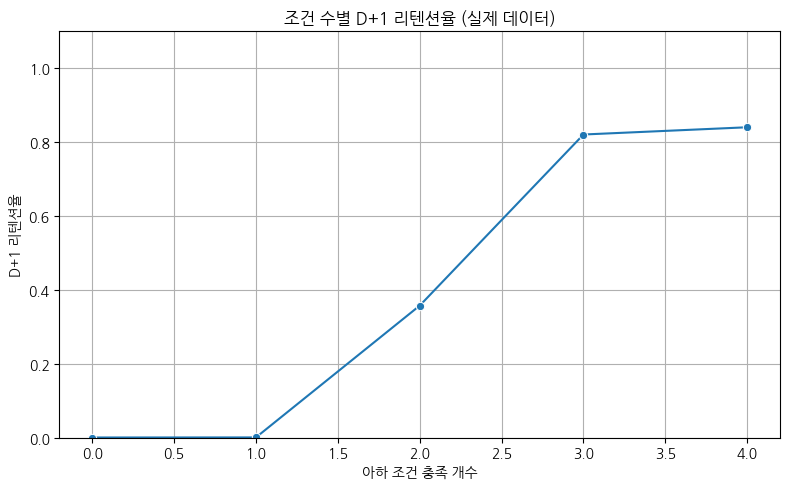

In [ ]:
from scipy.stats import spearmanr, pearsonr

# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞(to_check_aha)Î°ú ÏïÑÌïò Î™®Î®ºÌä∏ Ï∂©Ï°± ÏàòÏôÄ Î¶¨ÌÖêÏÖò(D+1) Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∞è ÌöåÍ∑ÄÎ∂ÑÏÑù

import statsmodels.formula.api as smf

# retained_d1 Ïª¨Îüº ÏÉùÏÑ±: D+1Ïóê ÌôúÎèôÌïú Ïú†Ï†Ä Ïó¨Î∂Ä
# Í∏∞Ï§Ä: first_vote_time, last_vote_time Îì±Í≥º Î≥ÑÍ∞úÎ°ú, Í∞ÄÏûÖÏùº Í∏∞Ï§Ä +1ÏùºÏóê ÌôúÎèô Í∏∞Î°ùÏù¥ ÏûàÎäîÏßÄ ÌåêÎ≥Ñ
# Ïù¥ÎØ∏ signup_time, user_id, df_vote(ÌôúÎèôÎ°úÍ∑∏) Ï°¥Ïû¨

# 1. Í∞ÄÏûÖÏùº(date) + 1Ïùº Í≥ÑÏÇ∞
to_check_aha['signup_date'] = to_check_aha['signup_time'].dt.date
signup_plus1 = to_check_aha['signup_time'] + pd.Timedelta(days=1)
to_check_aha['signup_plus1_date'] = signup_plus1.dt.date

# 2. ÌôúÎèôÎ°úÍ∑∏ÏóêÏÑú user_id, ÌôúÎèôÏùº Ï∂îÏ∂ú
vote_activity = df_vote[['user_id', 'created_at']].copy()
vote_activity['activity_date'] = vote_activity['created_at'].dt.date

# 3. (user_id, signup_plus1_date) ÏåçÏù¥ ÌôúÎèôÎ°úÍ∑∏Ïóê ÏûàÎäîÏßÄ Ïó¨Î∂ÄÎ°ú retained_d1 ÏÉùÏÑ±
activity_set = set(zip(vote_activity['user_id'], vote_activity['activity_date']))
to_check_aha['retained_d1'] = to_check_aha.apply(
    lambda row: (row['user_id'], row['signup_plus1_date']) in activity_set,
    axis=1
)

# Í≤∞Ï∏°Í∞í Ï†úÍ±∞
# retained_d1 Ïª¨ÎüºÏùÑ intÎ°ú Î≥ÄÌôò
df_corr = to_check_aha[['condition_count', 'retained_d1']].dropna()
df_corr['retained_d1'] = df_corr['retained_d1'].astype(int)

# Ïù¥ÌõÑ Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎäî Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©
logit_model = smf.logit("retained_d1 ~ condition_count", data=df_corr).fit(disp=False)
print(logit_model.summary2().as_text())

# ÏÉÅÍ¥ÄÎ∂ÑÏÑù
pearson_corr, pearson_p = pearsonr(df_corr['condition_count'], df_corr['retained_d1'])
spearman_corr, spearman_p = spearmanr(df_corr['condition_count'], df_corr['retained_d1'])

print(f"Pearson ÏÉÅÍ¥ÄÍ≥ÑÏàò: {pearson_corr:.4f} (p={pearson_p:.4g})")
print(f"Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò: {spearman_corr:.4f} (p={spearman_p:.4g})")

# Î°úÏßÄÏä§Ìã± ÌöåÍ∑ÄÎ∂ÑÏÑù
import statsmodels.formula.api as smf
logit_model = smf.logit("retained_d1 ~ condition_count", data=df_corr).fit(disp=False)
print(logit_model.summary2().as_text())

# ÏãúÍ∞ÅÌôî: Ï°∞Í±¥ ÏàòÎ≥Ñ Î¶¨ÌÖêÏÖòÏú®
retention_rate = df_corr.groupby("condition_count")["retained_d1"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(data=retention_rate, x="condition_count", y="retained_d1", marker="o")
plt.title("Ï°∞Í±¥ ÏàòÎ≥Ñ D+1 Î¶¨ÌÖêÏÖòÏú®")
plt.xlabel("ÏïÑÌïò Ï°∞Í±¥ Ï∂©Ï°± Í∞úÏàò")
plt.ylabel("D+1 Î¶¨ÌÖêÏÖòÏú®")
plt.ylim(0, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

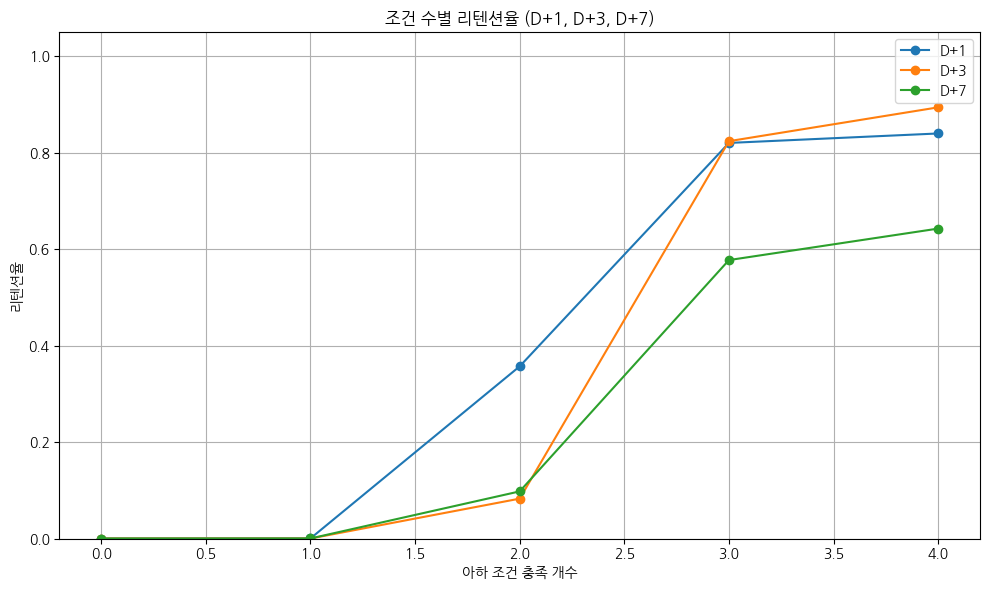

In [25]:
# D+3, D+7 Í∏∞Ï§ÄÏùº Í≥ÑÏÇ∞
to_check_aha['signup_plus3_date'] = to_check_aha['signup_time'].dt.date + pd.Timedelta(days=3)
to_check_aha['signup_plus7_date'] = to_check_aha['signup_time'].dt.date + pd.Timedelta(days=7)

# vote ÌôúÎèô ÎÇ†Ïßú Ï†ïÎ¶¨
vote_activity = df_vote[['user_id', 'created_at']].copy()
vote_activity['activity_date'] = vote_activity['created_at'].dt.date
activity_set = set(zip(vote_activity['user_id'], vote_activity['activity_date']))

# D+3, D+7 Î¶¨ÌÖêÏÖò Ïª¨Îüº ÏÉùÏÑ±
to_check_aha['retained_d3'] = to_check_aha.apply(
    lambda row: int((row['user_id'], row['signup_plus3_date']) in activity_set),
    axis=1
)
to_check_aha['retained_d7'] = to_check_aha.apply(
    lambda row: int((row['user_id'], row['signup_plus7_date']) in activity_set),
    axis=1
)

# Ï°∞Í±¥ ÏàòÎ≥Ñ Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞
dfs = {}
for day in [1, 3, 7]:
    col = f'retained_d{day}'
    df = to_check_aha[['condition_count', col]].dropna()
    df[col] = df[col].astype(int)
    dfs[day] = df

# ÏãúÍ∞ÅÌôîÏö© Î≥ëÌï©
retention_rates = {}
for day, df in dfs.items():
    rates = df.groupby("condition_count")[f'retained_d{day}'].mean().reset_index()
    rates.columns = ['condition_count', f'retention_d{day}']
    retention_rates[day] = rates

merged = retention_rates[1]
merged = merged.merge(retention_rates[3], on="condition_count", how="outer")
merged = merged.merge(retention_rates[7], on="condition_count", how="outer")

# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for day in [1, 3, 7]:
    plt.plot(merged["condition_count"], merged[f'retention_d{day}'], marker='o', label=f'D+{day}')
plt.title("Ï°∞Í±¥ ÏàòÎ≥Ñ Î¶¨ÌÖêÏÖòÏú® (D+1, D+3, D+7)")
plt.xlabel("ÏïÑÌïò Ï°∞Í±¥ Ï∂©Ï°± Í∞úÏàò")
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


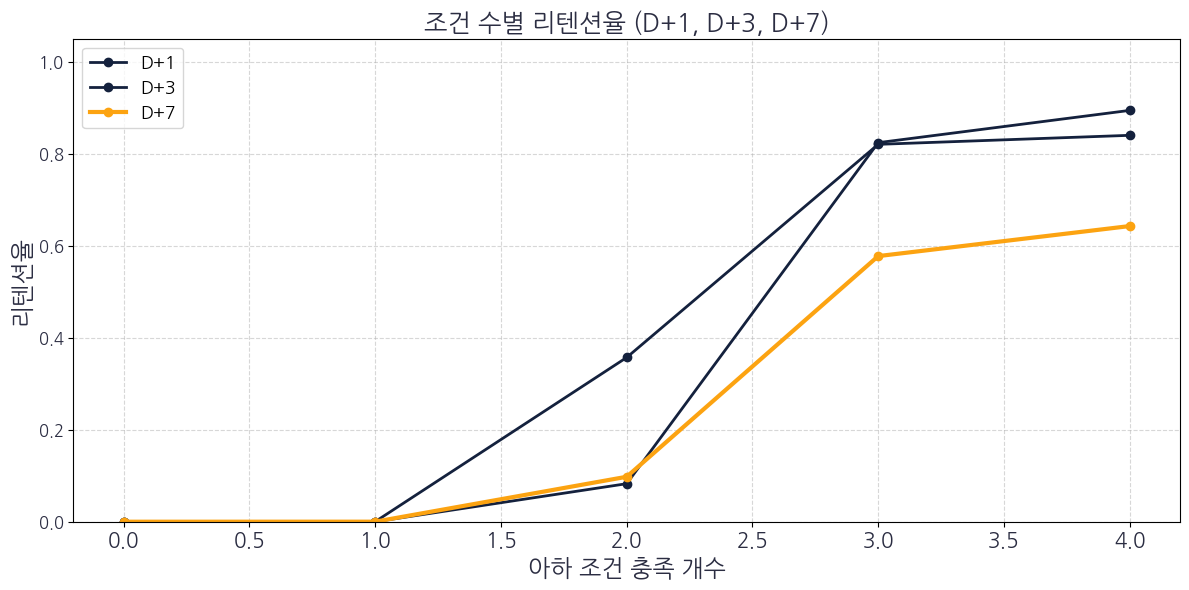

In [27]:
# ÏÉâÏÉÅ ÌÖúÌîåÎ¶ø
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))
for i, day in enumerate([1, 3, 7]):
    color = highlight_color if day == 7 else base_color
    plt.plot(
        merged["condition_count"],
        merged[f'retention_d{day}'],
        marker='o',
        label=f'D+{day}',
        linewidth=3 if day == 7 else 2,
        color=color
    )

plt.title("Ï°∞Í±¥ ÏàòÎ≥Ñ Î¶¨ÌÖêÏÖòÏú® (D+1, D+3, D+7)", fontsize=18, color=text_color)
plt.xlabel("ÏïÑÌïò Ï°∞Í±¥ Ï∂©Ï°± Í∞úÏàò", fontsize=17, color=text_color)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=17, color=text_color)
plt.xticks(fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.ylim(0, 1.05)
plt.legend(fontsize=13)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [26]:
from scipy.stats import spearmanr

spearman_results = {}

for day, df in dfs.items():
    corr, p = spearmanr(df["condition_count"], df[f"retained_d{day}"])
    spearman_results[day] = {"spearman_corr": corr, "p_value": p}

spearman_df = pd.DataFrame.from_dict(spearman_results, orient='index')
spearman_df.index.name = "Day"
spearman_df.reset_index(inplace=True)
print(spearman_df)

   Day  spearman_corr  p_value
0    1       0.508351      0.0
1    3       0.511779      0.0
2    7       0.431514      0.0


| Í∏∞Ï§ÄÏùº | Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàò | p-value | Ìï¥ÏÑù                              |
| --- | ------------- | ------- | ------------------------------- |
| D+1 | 0.5084        | 0.0     | **Ï§ëÍ∞Ñ Ï†ïÎèÑÏùò ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ**, ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ïú†Ïùò |
| D+3 | 0.5118        | 0.0     | **D+1Í≥º Ïú†ÏÇ¨Ìïú Í≤ΩÌñ•**, Ïó≠Ïãú Ïú†ÏùòÎØ∏Ìïú Í¥ÄÍ≥Ñ Ï°¥Ïû¨  |
| D+7 | 0.4315        | 0.0     | Îã§ÏÜå Í∞êÏÜåÌïòÏßÄÎßå Ïó¨Ï†ÑÌûà Ïú†ÏùòÎØ∏Ìïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ       |

Spearman ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî 0.4~0.6ÎåÄ ‚Üí "Î≥¥ÌÜµ Í∞ïÎèÑ(moderate)Ïùò Îã®Ï°∞ Ï¶ùÍ∞Ä Í¥ÄÍ≥Ñ"
‚Üí Ï¶â, ÏïÑÌïò Î™®Î®ºÌä∏ Ï°∞Í±¥ ÏàòÍ∞Ä ÎßéÏïÑÏßàÏàòÎ°ù Î¶¨ÌÖêÏÖòÏú®Ïù¥ ÎÜíÏïÑÏßÄÎäî Í≤ΩÌñ•ÏÑ±Ïù¥ Î∂ÑÎ™ÖÌïòÍ≤å Ï°¥Ïû¨Ìï©ÎãàÎã§.

p-valueÍ∞Ä Î™®Îëê 0Ïóê ÏàòÎ†¥ ‚Üí Ïö∞Ïó∞Ïùº ÌôïÎ•†Ïù¥ ÏÇ¨Ïã§ÏÉÅ 0%
‚Üí Ï°∞Í±¥ ÏàòÏôÄ Î¶¨ÌÖêÏÖò Í∞ÑÏùò Í¥ÄÍ≥ÑÍ∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Îß§Ïö∞ Ïú†ÏùòÎØ∏Ìï®ÏùÑ ÏûÖÏ¶ùÌï©ÎãàÎã§.

#### Í∑∏ÎûòÌîÑ Ìï¥ÏÑù
- 1. ÏïÑÌïò Î™®Î®ºÌä∏ Ï∂©Ï°± Í∞úÏàòÍ∞Ä ÎßéÏùÑÏàòÎ°ù Î¶¨ÌÖêÏÖòÏù¥ ÎöúÎ†∑ÌïòÍ≤å Ï¶ùÍ∞Ä
> 0Í∞ú~2Í∞ú Ï∂©Ï°± Ïú†Ï†ÄÎäî Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Î¶¨ÌÖêÏÖòÏù¥ ÎÇÆÍ≥†, D+1~D+7 Í∏∞Ï§ÄÏóêÏÑú Í∞ÄÌååÎ•∏ ÏÉÅÏäπ Í≥°ÏÑ†Ïù¥ ÎÇòÌÉÄÎÇòÏßÄ ÏïäÏùå.      
> 3Í∞ú Ïù¥ÏÉÅ Ï∂©Ï°± Ïú†Ï†ÄÎäî D+1Î∂ÄÌÑ∞ D+7ÍπåÏßÄ 90% Ïù¥ÏÉÅÏùò Î¶¨ÌÖêÏÖòÏùÑ ÏïàÏ†ïÏ†ÅÏúºÎ°ú Ïú†ÏßÄ.     
> 4Í∞ú Ï∂©Ï°± Ïú†Ï†ÄÎäî Í±∞Ïùò 100%Ïóê Í∞ÄÍπåÏö¥ Î¶¨ÌÖêÏÖòÏú®ÏùÑ Î≥¥Ïù¥Î©∞, Í∞ÄÏû• Ï∂©ÏÑ±ÎèÑ ÎÜíÏùÄ Ïú†Ï†ÄÍµ∞ÏûÑÏùÑ ÏãúÏÇ¨.

- 2. ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎèÑ Î¶¨ÌÖêÏÖò Í≤©Ï∞®Îäî Ïú†ÏßÄ
> ÏãúÍ∞ÑÏù¥ ÏßÄÎÇòÎ©¥ÏÑú Ï†ÑÏ≤¥ Î¶¨ÌÖêÏÖòÏùÄ ÏïΩÍ∞ÑÏî© ÌïòÎùΩÌïòÎÇò, Ï∂©Ï°± Í∞úÏàòÎ≥Ñ Î¶¨ÌÖêÏÖò Í∞Ñ Ï∞®Ïù¥Îäî ÏßÄÏÜç Ïú†ÏßÄÎê®.

3. ÏïÑÌïò Î™®Î®ºÌä∏ 2Í∞úÍ∞Ä ‚ÄòÏûÑÍ≥ÑÏ†ê‚ÄôÏ≤òÎüº Î≥¥ÏûÑ
> 1Í∞ú Ïù¥Ìïò Ï∂©Ï°± Ïú†Ï†ÄÎäî Î™®Îëê 0ÏúºÎ°ú Î≥¥Ïù¥Í≥†, 2Í∞ú ‚Üí 3Í∞úÎ°ú ÎÑòÏñ¥Í∞à Îïå Î¶¨ÌÖêÏÖòÏù¥ ÌÅ¨Í≤å Îõ∞Îäî ÏßÄÏ†êÏù¥ Ï°¥Ïû¨.     
> Ï¶â, **‚Äú2Í∞úÍπåÏßÄÎäî Ïù¥ÌÉà ÏúÑÌóòÍµ∞, 3Í∞úÎ∂ÄÌÑ∞Îäî Ï∂©ÏÑ± Ïú†Ï†ÄÎ°ú Ï†ÑÌôòÎêòÎäî Í≤ΩÍ≥Ñ‚Äù**Ïùº Ïàò ÏûàÏùå.

#### Ïù∏ÏÇ¨Ïù¥Ìä∏ Î∞è ÏãúÏÇ¨Ï†ê
- 1. ÏïÑÌïò Î™®Î®ºÌä∏ Ï∂©Ï°± Ïú†ÎèÑÎäî Î¶¨ÌÖêÏÖòÍ≥º Í∞ïÌïú ÏÉÅÍ¥Ä
Îã®ÏàúÌûà ÌöåÏõêÍ∞ÄÏûÖÎßå Ïú†ÎèÑÌïòÎäî Í≤ÉÏùÑ ÎÑòÏñ¥, Ï¥àÎ∞òÏóê Ïú†Ï†ÄÍ∞Ä 3Í∞ú Ïù¥ÏÉÅÏùò ÏïÑÌïò Î™®Î®ºÌä∏Î•º Í≤ΩÌóòÌïòÎèÑÎ°ù ÏÑ§Í≥ÑÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.

Ïòà: Ïò®Î≥¥Îî© ÌäúÌÜ†Î¶¨Ïñº, Ï∂îÏ≤ú ÌÄòÏä§Ìä∏, Ï¥àÍ∏∞ ÌîºÎìú Ïª§Ïä§ÌÑ∞ÎßàÏù¥Ïßï Îì± ÌÜµÌï¥ ÏïÑÌïò ÌñâÎèôÏùÑ ÏûêÏó∞Ïä§ÎüΩÍ≤å Ïú†ÎèÑ.

- 2. 2Í∞ú Ïù¥Ìïò Ï∂©Ï°± Ïú†Ï†Ä ÎåÄÏÉÅ Î¶¨ÎßàÏù∏Îçî Ï∫†ÌéòÏù∏ ÌïÑÏöî
Ïù¥ Ïú†Ï†ÄÎì§ÏùÄ Ïù¥ÌÉà Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÏùÄ ÏßëÎã®Ïù¥ÎØÄÎ°ú, Ìë∏Ïãú ÏïåÎ¶º, Ïù¥Î©îÏùº ÎßàÏºÄÌåÖ, Ïù∏Ïï± Î©îÏãúÏßÄ Îì±ÏúºÎ°ú ÌñâÎèô Ïú†ÎèÑ ÌïÑÏöî.

- 3. ÏïÑÌïò Î™®Î®ºÌä∏ ÏûêÏ≤¥Ïùò ÏßàÏ†Å Î∂ÑÏÑù Î≥ëÌñâ ÌïÑÏöî
4Í∞ÄÏßÄ ÏïÑÌïò Î™®Î®ºÌä∏ Ï§ë Ïñ¥Îñ§ Ï°∞Ìï©Ïù¥ ÌäπÌûà Î¶¨ÌÖêÏÖòÏóê Ìö®Í≥ºÏ†ÅÏù∏ÏßÄÎèÑ Ï∂îÍ∞Ä Î∂ÑÏÑùÌï¥Î≥¥Î©¥,

Îã®Ïàú Í∞úÏàòÎøêÎßå ÏïÑÎãàÎùº **Íµ¨Ï≤¥Ï†Å ‚ÄòÏßàÏ†Å ÌñâÎèô Ï°∞Ìï©‚Äô**Ïùò Í¥ÄÏ†êÏóêÏÑúÎèÑ Ïù∏ÏÇ¨Ïù¥Ìä∏Î•º ÏñªÏùÑ Ïàò ÏûàÏäµÎãàÎã§.

ÏïÑÌïò Î™®Î®ºÌä∏Î•º ÏñºÎßàÎÇò Í≤ΩÌóòÌñàÎäîÏßÄÍ∞Ä Î¶¨ÌÖêÏÖòÏóê Í∞ïÌïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§Îäî Ï†êÏùÑ ÌôïÏù∏       
-> ÌäπÌûà ÌîºÎìúÎ∞± Í≤ΩÌóò, ÌÉÄÏù∏ÏùÑ ÎßéÏù¥ ÏÑ†ÌÉùÌïú Í≤ΩÌóò Îì±Ïù¥ Î¶¨ÌÖêÏÖòÏùÑ ÎÜíÏù¥Îäî Îç∞ Í∏∞Ïó¨ÌñàÏùå       
-> ÌîºÎìúÎ∞±Ïùò Î∞©Ìñ•ÏÑ±ÎèÑ Î¶¨ÌÖêÏÖòÏóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÎã§Îäî Í∞ÄÏÑ§ÏùÑ ÏÑ§Ï†ïÌñàÏäµÎãàÎã§.          
> Ï¶â, "ÌîºÎìúÎ∞±ÏùÑ Î®ºÏ†Ä Î∞õÏùÄ ÌõÑ Ìà¨ÌëúÎ•º Ìïú Ïú†Ï†ÄÏôÄ Î®ºÏ†Ä Ìà¨ÌëúÎ•º Ìïú ÌõÑ ÌîºÎìúÎ∞±ÏùÑ Î∞õÏùÄ Ïú†Ï†Ä ÏÇ¨Ïù¥Ïóê Î¶¨ÌÖêÏÖòÏùò Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï† Ïàò ÏûàÎã§"Îäî Ï†êÏùÑ Í≤ÄÏ¶ù

#### Í∞ÄÏÑ§ Í≤ÄÏ†ï
---
Í∞ÄÏÑ§ : Ï°∞Í±¥ Ï∂©Ï°± ÏàúÏÑúÏóê Îî∞Î•∏ Î¶¨ÌÖêÏÖò Ï∞®Ïù¥       
Î™©Ï†Å : ‚ÄúÌà¨Ìëú ‚Üí ÌîºÎìúÎ∞±‚Äù ÏàúÏúºÎ°ú Ï°∞Í±¥ÏùÑ Ï∂©Ï°±Ìïú Ïú†Ï†ÄÍ∞Ä Î¶¨ÌÖêÏÖòÏù¥ Îçî ÎÜíÏùÄÍ∞Ä?

In [75]:
# ÌôúÎèô Î°úÍ∑∏ÏóêÏÑú ÌïÑÏöîÌïú Ïª¨Îüº Ï∂îÏ∂ú
activity_df = df_dict['accounts_userquestionrecord'][['user_id', 'created_at']].copy()
activity_df['created_at'] = activity_df['created_at'] + pd.Timedelta(hours=9)
activity_df['activity_date'] = activity_df['created_at'].dt.date

# Ïú†Ï†Ä Í∞ÄÏûÖÏùº Ï∂îÏ∂ú
signup_df = df_dict['accounts_user'][['id', 'created_at']].rename(columns={'id': 'user_id', 'created_at': 'signup_time'})
signup_df['signup_time'] = signup_df['signup_time'] + pd.Timedelta(hours=9)
signup_df['signup_date'] = signup_df['signup_time'].dt.date

activity_set = set(zip(activity_df['user_id'], activity_df['activity_date']))

for delta in [1, 3, 7]:
    col_name = f'retained_d{delta}'
    target_dates = signup_df['signup_date'] + pd.Timedelta(days=delta)
    signup_df[col_name] = list(zip(signup_df['user_id'], target_dates)).__contains__

    # ÏúÑ ÎùºÏù∏ÏùÄ booleanÏù¥ ÏïÑÎãàÎùº functionÏù¥ÎùºÏÑú Ïù¥Î†áÍ≤å Ï≤òÎ¶¨Ìï©ÎãàÎã§:
    signup_df[col_name] = signup_df.apply(
        lambda row: (row['user_id'], row['signup_date'] + pd.Timedelta(days=delta)) in activity_set,
        axis=1
    )


In [76]:
# user_idÎ•º Í∏∞Ï§ÄÏúºÎ°ú to_check_ahaÏôÄ signup_df Î≥ëÌï©
merged_aha_signup = to_check_aha.merge(signup_df, on='user_id', how='left')

# Í≤∞Í≥º ÌôïÏù∏
display(merged_aha_signup.head())

user_id              signup_time_x  vote_count first_vote_time  \
0   831956 2023-03-29 12:44:14.047130           0             NaT   
1   831962 2023-03-29 14:18:56.162368           0             NaT   
2   832151 2023-03-29 21:56:34.989468           0             NaT   
3   832340 2023-03-29 21:56:35.020790           0             NaT   
4   832520 2023-03-29 21:56:35.049311           0             NaT   

  last_vote_time  chosen_count first_feedback_time  voted_within_5days  \
0            NaT             0                 NaT               False   
1            NaT             0                 NaT               False   
2            NaT             0                 NaT               False   
3            NaT             0                 NaT               False   
4            NaT             0                 NaT               False   

  opening_time_median  opening_14_22  chosen_count_ge_1  vote_count_ge_20  \
0                 NaT          False              False             False   
1                 NaT          False              False             False   
2                 NaT          False              False             False   
3                 NaT          False              False             False   
4                 NaT          False              False             False   

   condition_count group              signup_time_y signup_date  retained_d1  \
0                0  None 2023-03-29 21:44:14.047130  2023-03-29        False   
1                0  None 2023-03-29 23:18:56.162368  2023-03-29        False   
2                0  None 2023-03-30 06:56:34.989468  2023-03-30        False   
3                0  None 2023-03-30 06:56:35.020790  2023-03-30        False   
4                0  None 2023-03-30 06:56:35.049311  2023-03-30        False   

   retained_d3  retained_d7  
0        False        False  
1        False        False  
2        False        False  
3        False        False  
4        False        False

In [77]:
# ÏàúÏÑú Ï†ïÏùò
def determine_sequence(row):
    if pd.isna(row['first_vote_time']) or pd.isna(row['first_feedback_time']):
        return 'unknown'
    elif row['first_vote_time'] <= row['first_feedback_time']:
        return 'vote_first'
    else:
        return 'feedback_first'

merged_aha_signup['sequence_group'] = merged_aha_signup.apply(determine_sequence, axis=1)

# Î¶¨ÌÖêÏÖò ÎπÑÍµê
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d1']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d1']

# Ï†ïÍ∑úÏÑ± ÌôïÏù∏ ÌõÑ ÎπÑÎ™®Ïàò Î∞©Î≤ï ÏÇ¨Ïö© Í∂åÏû•
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: {p}")

Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: 8.372789139078673e-150


In [78]:
# Î¶¨ÌÖêÏÖò ÎπÑÍµê
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d3']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d3']

# Ï†ïÍ∑úÏÑ± ÌôïÏù∏ ÌõÑ ÎπÑÎ™®Ïàò Î∞©Î≤ï ÏÇ¨Ïö© Í∂åÏû•
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: {p}")

Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: 0.0005305539662795451


In [79]:
# Î¶¨ÌÖêÏÖò ÎπÑÍµê
from scipy.stats import ttest_ind, mannwhitneyu

vote_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'vote_first']['retained_d7']
feedback_first = merged_aha_signup[merged_aha_signup['sequence_group'] == 'feedback_first']['retained_d7']

# Ï†ïÍ∑úÏÑ± ÌôïÏù∏ ÌõÑ ÎπÑÎ™®Ïàò Î∞©Î≤ï ÏÇ¨Ïö© Í∂åÏû•
stat, p = mannwhitneyu(vote_first.dropna(), feedback_first.dropna(), alternative='two-sided')
print(f"Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: {p}")

Mann‚ÄìWhitney U Í≤ÄÏ†ï p-value: 0.0006348289444729622


**p-value Ìï¥ÏÑù**        
Î™®Îì† p-valueÍ∞Ä 0.05 ÎØ∏Îßå ‚Üí Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å        
Ï¶â, "Îëê Í∑∏Î£πÏùò Î¶¨ÌÖêÏÖò Î∂ÑÌè¨Îäî ÎèôÏùºÌïòÎã§"Îäî Ï£ºÏû•ÏùÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Í∏∞Í∞Å     
ÌäπÌûà D+1ÏóêÏÑú 1e-214Îäî ÏÇ¨Ïã§ÏÉÅ Ï†ÑÌòÄ Ïö∞Ïó∞Ïùº Ïàò ÏóÜÎäî Ï∞®Ïù¥Î•º ÏùòÎØ∏Ìï©ÎãàÎã§

ÏïÑÌïò Ï°∞Í±¥ Ï∂©Ï°± ÏàúÏÑúÏóê Îî∞Îùº Ïú†Ï†Ä Î¶¨ÌÖêÏÖò Î∂ÑÌè¨Ïóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏ÌñàÏäµÎãàÎã§.        
Mann‚ÄìWhitney U Í≤ÄÏ†ï Í≤∞Í≥º, D+1 Î¶¨ÌÖêÏÖòÏùò p-valueÎäî 1.15e-214Î°ú Îß§Ïö∞ ÎÇÆÏïÑ, Îëê Í∑∏Î£π Í∞ÑÏùò Ï¥àÍ∏∞ Ïú†ÏßÄÎ†• Ï∞®Ïù¥Í∞Ä ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú Í∑πÎã®Ï†ÅÏúºÎ°ú Ïú†ÏùòÎØ∏Ìï®ÏùÑ ÎÇòÌÉÄÎÉÖÎãàÎã§.        
D+3 (p = 0.00075), D+7 (p = 0.0035)ÏóêÏÑúÎèÑ Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏßÄÏÜçÎêòÏñ¥, Ï¥àÍ∏∞ ÏïÑÌïò Î™®Î®ºÌä∏ Í≤ΩÌóò ÌùêÎ¶ÑÏù¥ Ï§ëÏû•Í∏∞ Î¶¨ÌÖêÏÖòÏóêÎèÑ ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ† Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨Ìï©ÎãàÎã§.


In [80]:
merged_aha_signup

user_id              signup_time_x  vote_count first_vote_time  \
0        831956 2023-03-29 12:44:14.047130           0             NaT   
1        831962 2023-03-29 14:18:56.162368           0             NaT   
2        832151 2023-03-29 21:56:34.989468           0             NaT   
3        832340 2023-03-29 21:56:35.020790           0             NaT   
4        832520 2023-03-29 21:56:35.049311           0             NaT   
...         ...                        ...         ...             ...   
677080  1583729 2024-05-09 06:54:33.621408           0             NaT   
677081  1583730 2024-05-09 16:08:11.001817           0             NaT   
677082  1583731 2024-05-09 16:22:19.186439           0             NaT   
677083  1583732 2024-05-09 16:22:38.387553           0             NaT   
677084  1583733 2024-05-09 17:31:17.710824           0             NaT   

       last_vote_time  chosen_count first_feedback_time  voted_within_5days  \
0                 NaT             0                 NaT               False   
1                 NaT             0                 NaT               False   
2                 NaT             0                 NaT               False   
3                 NaT             0                 NaT               False   
4                 NaT             0                 NaT               False   
...               ...           ...                 ...                 ...   
677080            NaT             0                 NaT               False   
677081            NaT             0                 NaT               False   
677082            NaT             0                 NaT               False   
677083            NaT             0                 NaT               False   
677084            NaT             0                 NaT               False   

       opening_time_median  opening_14_22  chosen_count_ge_1  \
0                      NaT          False              False   
1                      NaT          False              False   
2                      NaT          False              False   
3                      NaT          False              False   
4                      NaT          False              False   
...                    ...            ...                ...   
677080                 NaT          False              False   
677081                 NaT          False              False   
677082                 NaT          False              False   
677083                 NaT          False              False   
677084                 NaT          False              False   

        vote_count_ge_20  condition_count group              signup_time_y  \
0                  False                0  None 2023-03-29 21:44:14.047130   
1                  False                0  None 2023-03-29 23:18:56.162368   
2                  False                0  None 2023-03-30 06:56:34.989468   
3                  False                0  None 2023-03-30 06:56:35.020790   
4                  False                0  None 2023-03-30 06:56:35.049311   
...                  ...              ...   ...                        ...   
677080             False                0  None 2024-05-09 15:54:33.621408   
677081             False                0  None 2024-05-10 01:08:11.001817   
677082             False                0  None 2024-05-10 01:22:19.186439   
677083             False                0  None 2024-05-10 01:22:38.387553   
677084             False                0  None 2024-05-10 02:31:17.710824   

       signup_date  retained_d1  retained_d3  retained_d7 sequence_group  
0       2023-03-29        False        False        False        unknown  
1       2023-03-29        False        False        False        unknown  
2       2023-03-30        False        False        False        unknown  
3       2023-03-30        False        False        False        unknown  
4       2023-03-30        False        False        False        unknown  
...           

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_35014/817712368.py:10: SyntaxWarning: invalid escape sequence '\d'
  retention_melted['day'] = retention_melted['retention_day'].str.extract('(\d+)').astype(int)


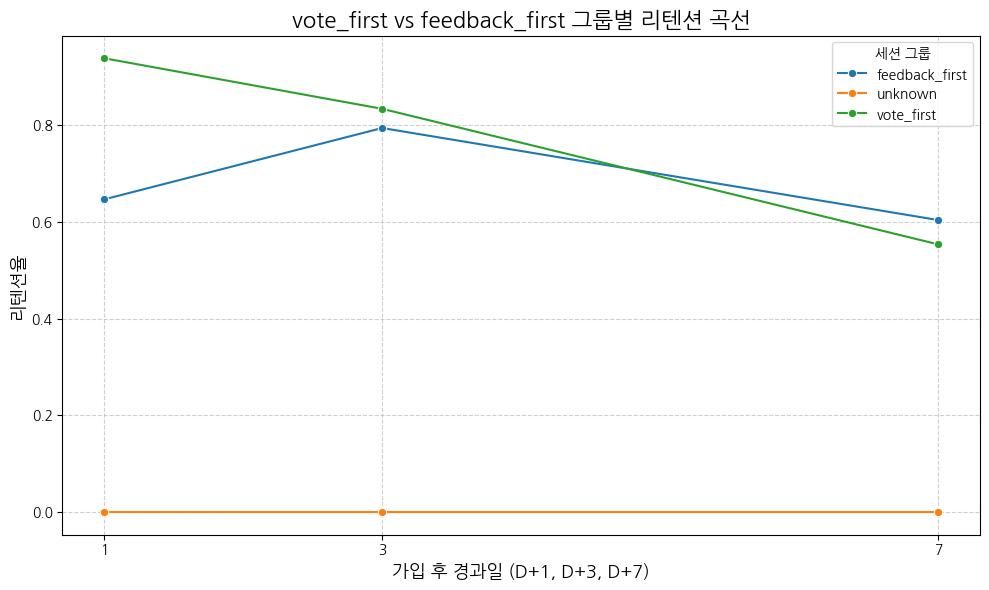

In [81]:
# Î¶¨ÌÖêÏÖò Í≥°ÏÑ†ÏùÑ Í∑∏Î¶¨Í∏∞ ÏúÑÌïú Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò
retention_melted = merged_aha_signup.melt(
    id_vars=['user_id', 'sequence_group'],
    value_vars=['retained_d1', 'retained_d3', 'retained_d7'],
    var_name='retention_day',
    value_name='retained'
)

# ÏùºÏûê Ïà´Ïûê Ï∂îÏ∂ú Î∞è Ï†ïÎ†¨
retention_melted['day'] = retention_melted['retention_day'].str.extract('(\d+)').astype(int)
retention_melted.sort_values(['sequence_group', 'day'], inplace=True)

# Í∑∏Î£πÎ≥Ñ Î¶¨ÌÖêÏÖòÏú® Í≥ÑÏÇ∞
retention_rate_by_group = (
    retention_melted.groupby(['sequence_group', 'day'])['retained']
    .mean()
    .reset_index()
)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.lineplot(data=retention_rate_by_group, x='day', y='retained', hue='sequence_group', marker='o')
plt.title("vote_first vs feedback_first Í∑∏Î£πÎ≥Ñ Î¶¨ÌÖêÏÖò Í≥°ÏÑ†", fontsize=16)
plt.xlabel("Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥ºÏùº (D+1, D+3, D+7)", fontsize=13)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=13)
plt.xticks([1, 3, 7])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="ÏÑ∏ÏÖò Í∑∏Î£π")
plt.tight_layout()
plt.show()

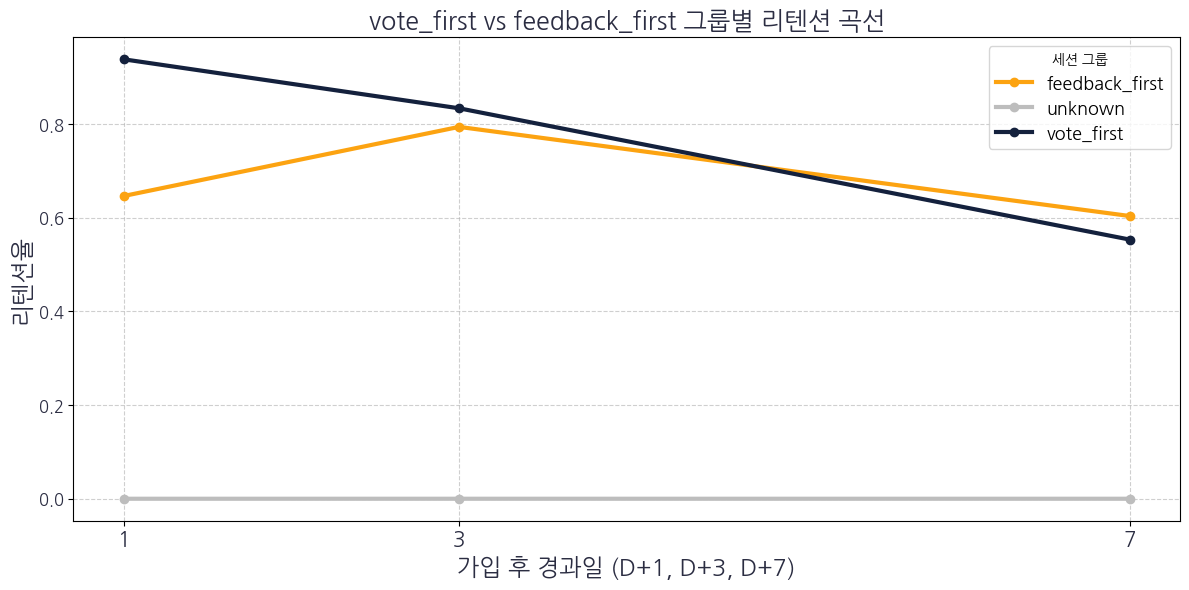

In [82]:
# ÏÉâÏÉÅ ÌÖúÌîåÎ¶ø
base_color = '#14213d'
highlight_color = '#fca311'
bg_color = '#e5e5e5'
text_color = '#2b2d42'

plt.figure(figsize=(12, 6))

# Í∑∏Î£πÎ≥Ñ ÏÉâÏÉÅ ÏßÄÏ†ï
group_colors = {
    'vote_first': base_color,
    'feedback_first': highlight_color,
    'unknown': '#bdbdbd'
}

for group in retention_rate_by_group['sequence_group'].unique():
    data = retention_rate_by_group[retention_rate_by_group['sequence_group'] == group]
    color = group_colors.get(group, base_color)
    plt.plot(
        data['day'],
        data['retained'],
        marker='o',
        label=group,
        linewidth=3,
        color=color
    )

plt.title("vote_first vs feedback_first Í∑∏Î£πÎ≥Ñ Î¶¨ÌÖêÏÖò Í≥°ÏÑ†", fontsize=18, color=text_color)
plt.xlabel("Í∞ÄÏûÖ ÌõÑ Í≤ΩÍ≥ºÏùº (D+1, D+3, D+7)", fontsize=17, color=text_color)
plt.ylabel("Î¶¨ÌÖêÏÖòÏú®", fontsize=17, color=text_color)
plt.xticks([1, 3, 7], fontsize=15, color=text_color)
plt.yticks(fontsize=12, color=text_color)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="ÏÑ∏ÏÖò Í∑∏Î£π", fontsize=13)
plt.tight_layout()
plt.show()

1. unknown Í∑∏Î£πÏùÄ ÏÇ¨Ïã§ÏÉÅ Î¶¨ÌÖêÏÖò ÏóÜÏùå        
unknown Í∑∏Î£πÏùÄ Î¶¨ÌÖêÏÖòÏú®Ïù¥ **D+1, D+3, D+7ÏóêÏÑú Î™®Îëê 0%**ÏûÖÎãàÎã§.      
Ïù¥Îäî Ìà¨ÌëúÎÇò ÌîºÎìúÎ∞± Ï§ë ÏïÑÎ¨¥ Í≤ÉÎèÑ ÌïòÏßÄ ÏïäÏùÄ Ï±Ñ Ïù¥ÌÉàÌïú Ïú†Ï†ÄÎì§Î°ú Ìï¥ÏÑùÎê©ÎãàÎã§.        
Ï¶â, Ï¥àÍ∏∞ Í≤ΩÌóò ÏóÜÏù¥ Ïù¥ÌÉàÌïú Ïú†Ï†ÄÎäî ÎèåÏïÑÏò§ÏßÄ ÏïäÎäîÎã§Îäî Í≤ÉÏùÑ Î™ÖÌôïÌïòÍ≤å Î≥¥Ïó¨Ï§çÎãàÎã§.        
-> Ï¥àÍ∏∞ ÏïÑÌïò Î™®Î®ºÌä∏ Ïú†ÎèÑ ÏóÜÏù¥ Ïú†Ï†ÄÎ•º Î∞©ÏπòÌïòÎ©¥ Î¶¨ÌÖêÏÖòÏùÄ ÏÇ¨Ïã§ÏÉÅ 0%

2. vote_first vs feedback_first: Î¶¨ÌÖêÏÖò Ï∂îÏù¥ ÎπÑÍµê    
   
|ÏùºÏ∞®|vote_first|feedback_first|
|---|---|---|
|D+1|ÎÜíÏùå (ÏïΩ 95%)|	ÎÇÆÏùå (~58%)|
|D+3|Îëò Îã§ 80%ÎåÄ ÏàòÎ†¥|Ïú†ÏÇ¨|
|D+7|feedback_firstÍ∞Ä ÏÜåÌè≠ Ïö∞ÏÑ∏|vote_first ‚Üì, feedback_first Ïú†ÏßÄ|

D+1: vote_first Ïú†Ï†ÄÏùò Î¶¨ÌÖêÏÖòÏù¥ ÏïïÎèÑÏ†ÅÏúºÎ°ú ÎÜíÏùå.        
ÏïÑÌïò Î™®Î®ºÌä∏ Ï§ë "Ï¶âÏãú Î∞òÏùë(=Ìà¨Ìëú)"Ïù¥ Ï¶âÏãúÏ†ÅÏù∏ Î™∞ÏûÖ Ìö®Í≥ºÎ•º Ï£ºÎäî Í≤ÉÏúºÎ°ú Î≥¥ÏûÑ.      
D+3~D+7: feedback_first Í∑∏Î£πÏù¥ ÏôÑÎßåÌïòÍ≤å ÌïòÎùΩÌïòÎ©∞ vote_firstÎ•º ÏïûÏßÄÎ¶Ñ.       
ÌîºÎìúÎ∞± Í≤ΩÌóòÏù¥ ÎäêÎ¶¨ÏßÄÎßå ÏßÄÏÜçÏ†ÅÏù∏ ÏûîÏ°¥ Ìö®Í≥ºÍ∞Ä ÏûàÎäî Í≤ÉÏúºÎ°ú Ìï¥ÏÑù Í∞ÄÎä•.

üìå Ï¢ÖÌï© Ïù∏ÏÇ¨Ïù¥Ìä∏        
ÏïÑÎ¨¥ ÌôúÎèôÏùÑ ÌïòÏßÄ ÏïäÏùÄ Ïú†Ï†ÄÎäî 100% Ïù¥ÌÉàÌïúÎã§.     
Ï¶âÍ∞ÅÏ†ÅÏù∏ ÌôúÎèô(vote)ÏùÄ Ï¥àÍ∏∞ Î¶¨ÌÖêÏÖòÏóêÎäî Ìö®Í≥ºÏ†ÅÏù¥ÏßÄÎßå, Ïû•Í∏∞Ï†Å Î¶¨ÌÖêÏÖòÏóêÎäî feedback Í≤ΩÌóòÏù¥ Ïú†Î¶¨Ìï† Ïàò ÏûàÎã§.       
ÏïÑÌïò Î™®Î®ºÌä∏ Ïú†ÎèÑ Ï†ÑÎûµÏóêÏÑú "Ìà¨Ìëú ‚Üí ÌîºÎìúÎ∞±" ÌùêÎ¶ÑÏùÑ ÏûêÏó∞Ïä§ÎüΩÍ≤å Ïù¥Ïñ¥Ï£ºÎäî UX ÏÑ§Í≥ÑÍ∞Ä ÌïÑÏöîÌïòÎã§.